<a href="https://colab.research.google.com/github/anggaangoro3/data-science-project/blob/main/analisis_tren_pasar_dan_strategi_pertumbuhan_di_industri_kendaraan_listrik_ev_global_2010_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import kagglehub
import os
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi visualisasi
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (12, 6)})

In [ ]:
# Download dataset dari Kaggle
path = kagglehub.dataset_download("patricklford/global-ev-sales-2010-2024")
print(f"Path to dataset: {path}")

# Cari file CSV
files_in_directory = os.listdir(path)
print(f"Files available: {files_in_directory}")

# Load CSV
csv_file_path = os.path.join(path, files_in_directory[0])
df = pd.read_csv(csv_file_path)
print(f"\n✓ Dataset berhasil dimuat!")
print(f"Shape: {df.shape}")

df = pd.read_csv(csv_file_path)
df.head()

100%|██████████| 83.3k/83.3k [00:00<00:00, 38.3MB/s]

Extracting files...
Path to dataset: /root/.cache/kagglehub/datasets/patricklford/global-ev-sales-2010-2024/versions/1
Files available: ['IEA Global EV Data 2024.csv']

✓ Dataset berhasil dimuat!
Shape: (12654, 8)


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [ ]:
print("\n" + "="*80)
print("INSPEKSI DATA")
print("="*80)

print("\n--- Preview Data ---")
print(df.head(10))

print("\n--- Informasi Dataset ---")
print(df.info())

print("\n--- Statistik Deskriptif ---")
print(df.describe(include='all').T)

print("\n--- Nilai Unik per Kolom Kategorikal ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} kategori unik")
    print(f"  → {df[col].unique()[:10]}")  # Tampilkan 10 pertama


INSPEKSI DATA

--- Preview Data ---
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   
5  Australia  Historical        EV sales  Cars        BEV  2012  Vehicles   
6  Australia  Historical  EV sales share  Cars         EV  2012   percent   
7  Australia  Historical  EV stock share  Cars         EV  2012   percent   
8  Australia  Historical        EV stock  Cars       PHEV  2012  Vehicles   
9  Australia  Historical        EV sales  Cars       PHEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  
5  170.00000  
6    0.030

In [ ]:
print("\n" + "="*80)
print("DATA CLEANING")
print("="*80)

# Cek missing values
print("\n--- Missing Values ---")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])
if missing_data.sum() == 0:
    print("✓ Tidak ada missing values")

# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"\n--- Duplikasi Data ---")
print(f"Jumlah duplikat: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"✓ {duplicate_count} baris duplikat dihapus")

# Konversi tipe data
print("\n--- Konversi Tipe Data ---")
df['year'] = pd.to_datetime(df['year'], format='%Y')
print("✓ Kolom 'year' dikonversi ke datetime")

# Rentang tahun
print(f"\n--- Rentang Waktu Dataset ---")
print(f"Dari: {df['year'].min().year}")
print(f"Sampai: {df['year'].max().year}")

# Filter data historical dan tahun 2010-2024
df_historical = df[df['category'] == 'Historical'].copy()
df_filtered = df[(df['year'].dt.year >= 2010) & (df['year'].dt.year <= 2024)].copy()

print(f"\n✓ Data cleaning selesai!")
print(f"Shape setelah cleaning: {df.shape}")
print(f"Historical data shape: {df_historical.shape}")


DATA CLEANING

--- Missing Values ---
Series([], dtype: int64)
✓ Tidak ada missing values

--- Duplikasi Data ---
Jumlah duplikat: 0

--- Konversi Tipe Data ---
✓ Kolom 'year' dikonversi ke datetime

--- Rentang Waktu Dataset ---
Dari: 2010
Sampai: 2035

✓ Data cleaning selesai!
Shape setelah cleaning: (12654, 8)
Historical data shape: (9174, 8)


In [ ]:
df.info() # Cek tipe data dan nilai null
df.describe() # Dapatkan statistik dasar untuk kolom numerik (terutama kolom 'value')
df.isnull().sum() # Cek apakah ada data yang hilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   region      12654 non-null  object        
 1   category    12654 non-null  object        
 2   parameter   12654 non-null  object        
 3   mode        12654 non-null  object        
 4   powertrain  12654 non-null  object        
 5   year        12654 non-null  datetime64[ns]
 6   unit        12654 non-null  object        
 7   value       12654 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 791.0+ KB


,0
region,0
category,0
parameter,0
mode,0
powertrain,0
year,0
unit,0
value,0



EXPLORATORY DATA ANALYSIS

[1/10] Membuat visualisasi distribusi tahun...


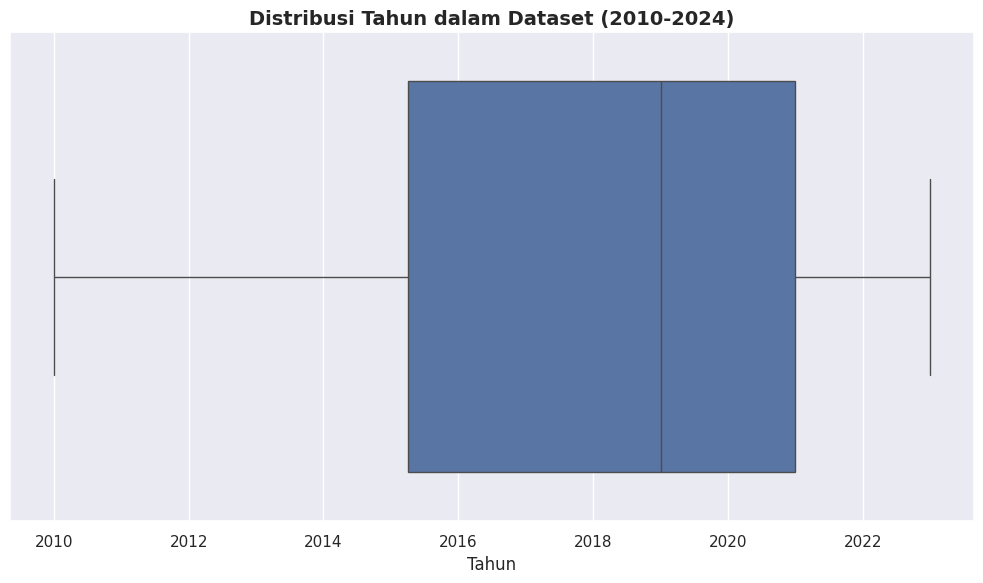

In [ ]:
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Filter data for years between 2010 and 2024
df_filtered = df[(df['year'].dt.year >= 2010) & (df['year'].dt.year <= 2024)].copy()
df_historical = df[df['category'] == 'Historical'].copy()

# --- 5.1 Distribusi Tahun ---
print("\n[1/10] Membuat visualisasi distribusi tahun...")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['year'].dt.year)
plt.title("Distribusi Tahun dalam Dataset (2010-2024)", fontsize=14, fontweight='bold')
plt.xlabel("Tahun")
plt.tight_layout()
plt.show()



In [ ]:
print("Parameter yang ada dalam dataset:")
print(df['parameter'].unique())

Parameter yang ada dalam dataset:
['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']



[2/10] Membuat histogram untuk kolom numerik...


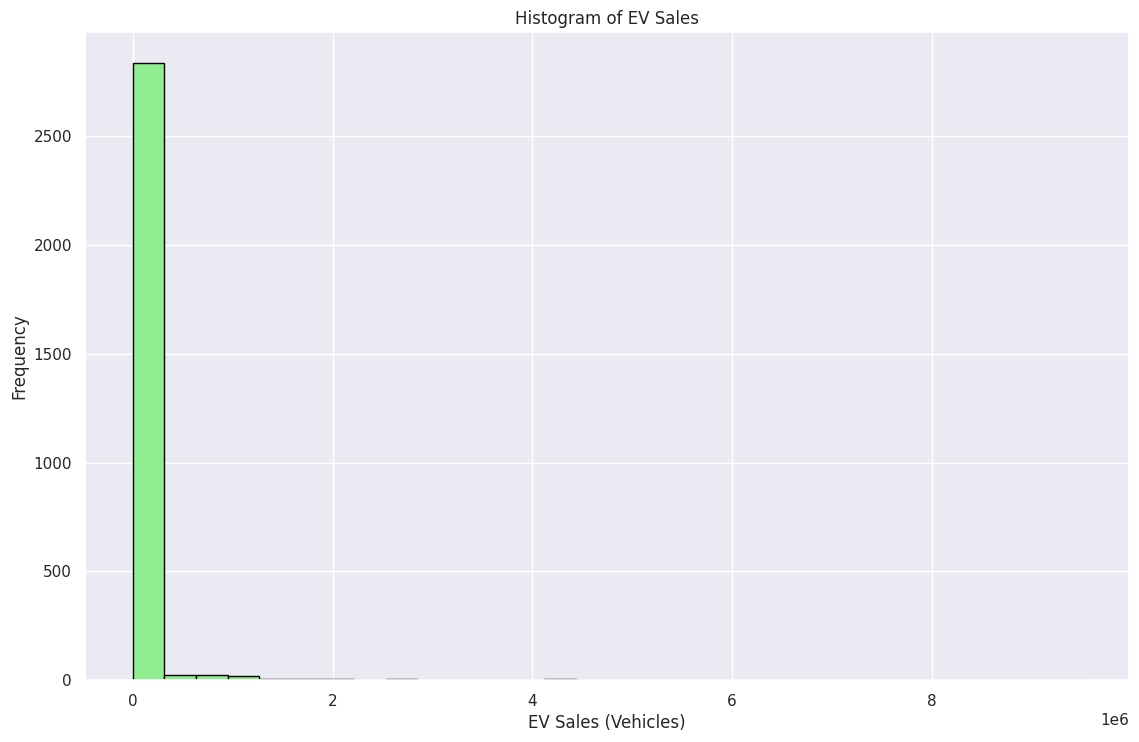

In [ ]:
# --- 5.2 Histogram untuk Kolom Numerik ---
print("\n[2/10] Membuat histogram untuk kolom numerik...")
# Filter data for EV sales
ev_sales = df_filtered[df_filtered['parameter'] == 'EV sales'].copy() # Corrected: Filter df_filtered for 'EV sales'

# Plot histogram of EV sales
plt.figure(figsize=(12, 8))
plt.hist(ev_sales['value'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of EV Sales')
plt.xlabel('EV Sales (Vehicles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
for col in df_filtered.columns:
      print(f"\n{col}: {df_filtered[col].nunique()} nilai unik")
      print(f"  → {df_filtered[col].unique()}") # Tampilkan seluruh nilai unik


region: 54 nilai unik
  → ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']

category: 3 nilai unik
  → ['Historical' 'Projection-STEPS' 'Projection-APS']

parameter: 8 nilai unik
  → ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']

mode: 5 nilai unik
  → ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']

powertrain: 6 nilai unik
  → ['EV' 'BEV' 'PHEV' 'Public


[5/10] Membuat countplot untuk variabel kategorikal...


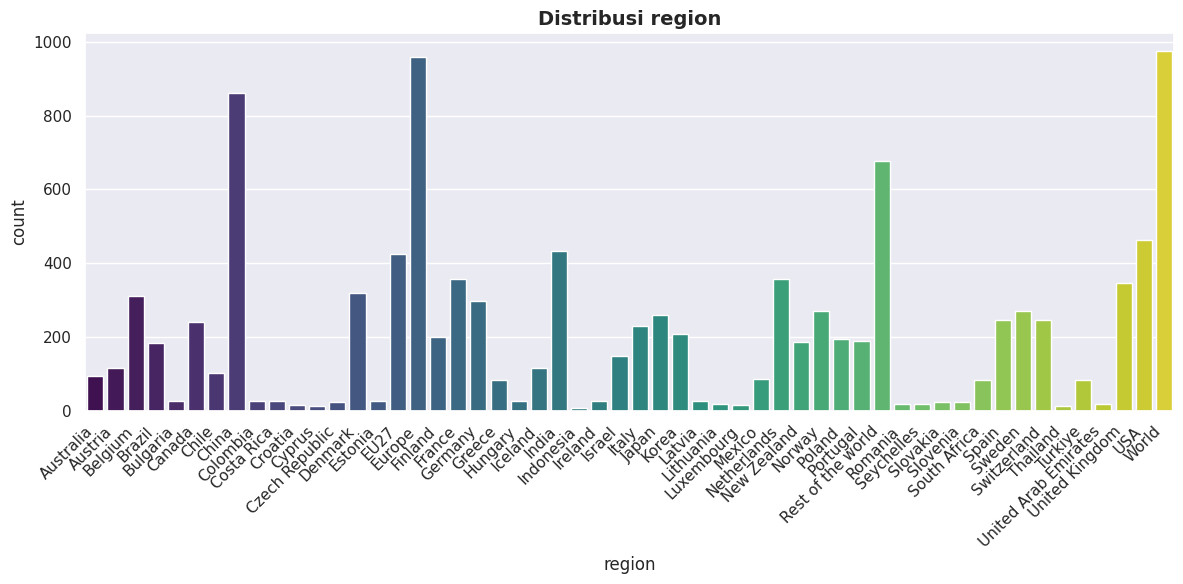

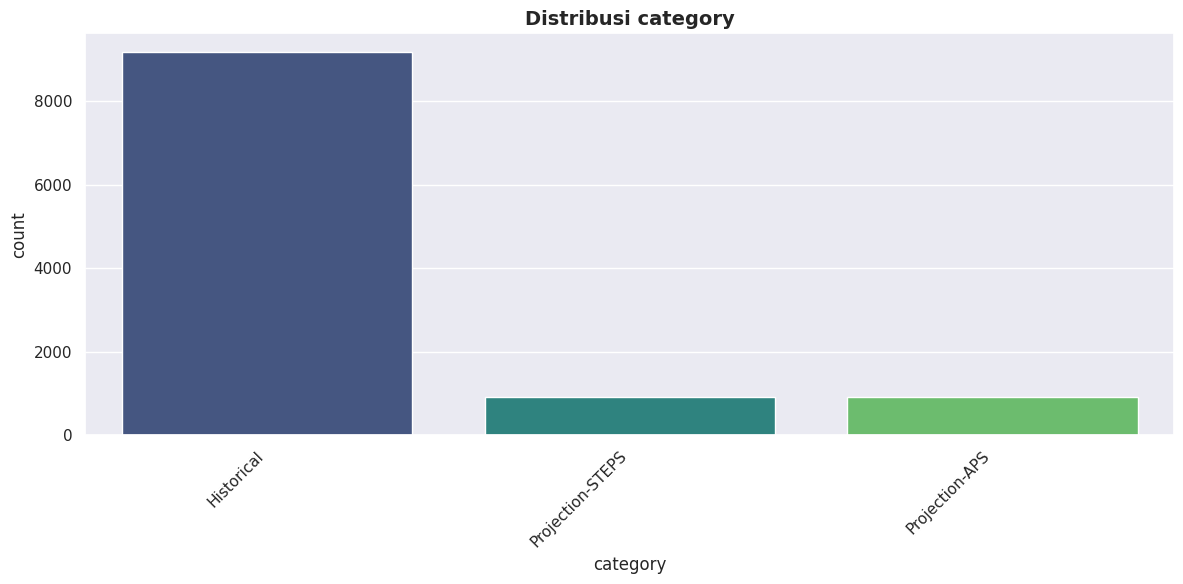

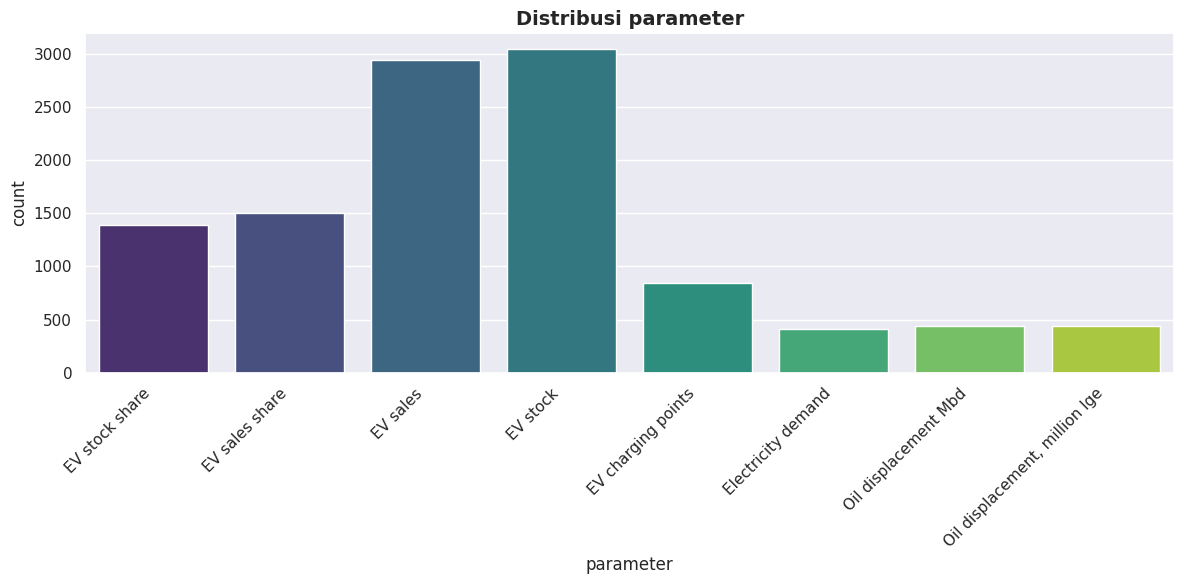

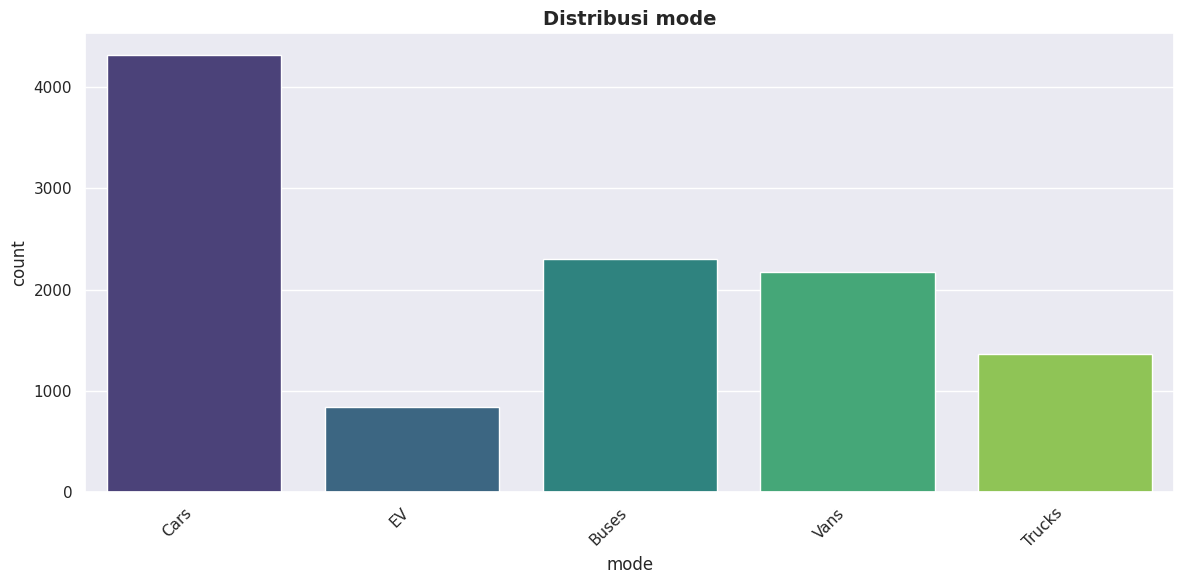

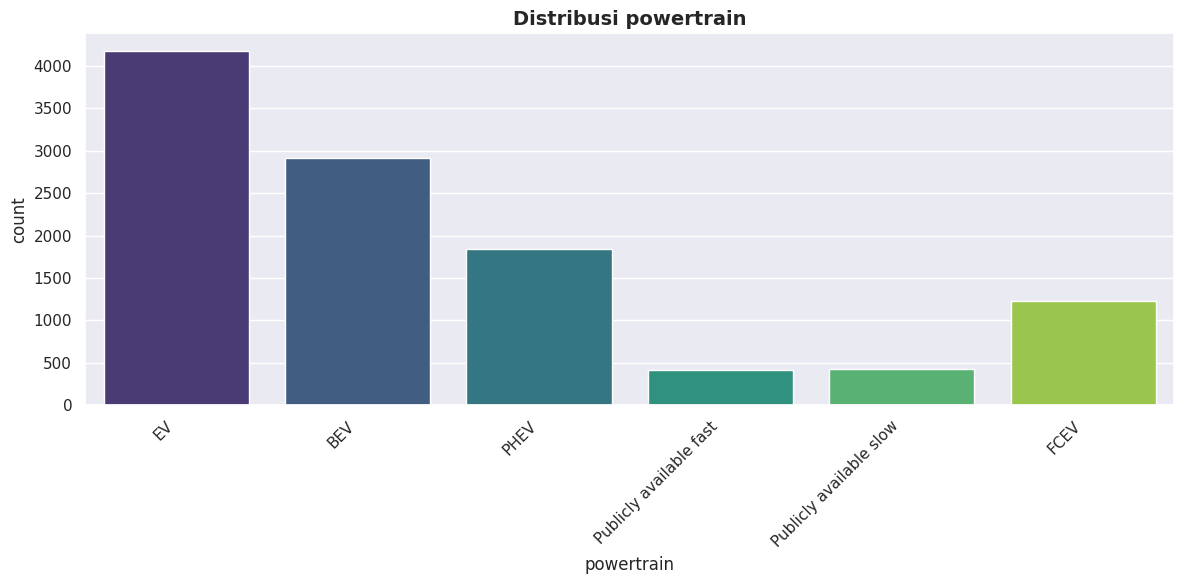

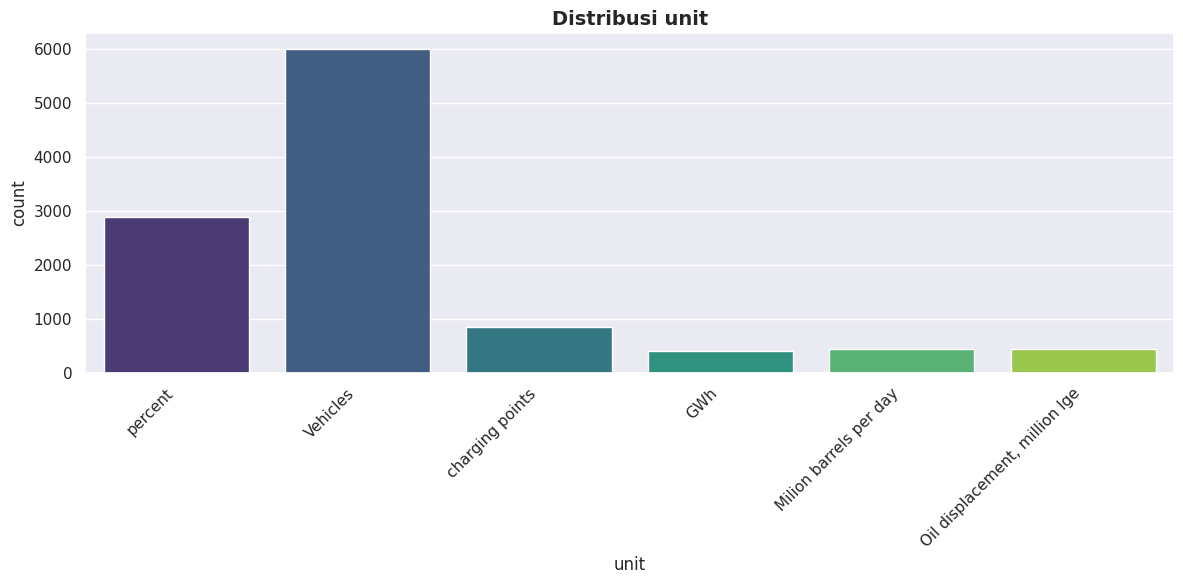

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 5.5 Countplot untuk Kategorikal ---
print("\n[5/10] Membuat countplot untuk variabel kategorikal...")
sns.set(rc={"figure.figsize": (22, 9)})
for col in df_filtered.select_dtypes(include="object").columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_filtered, x=col, palette='viridis') # Added palette for color
    plt.title(f"Distribusi {col}", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

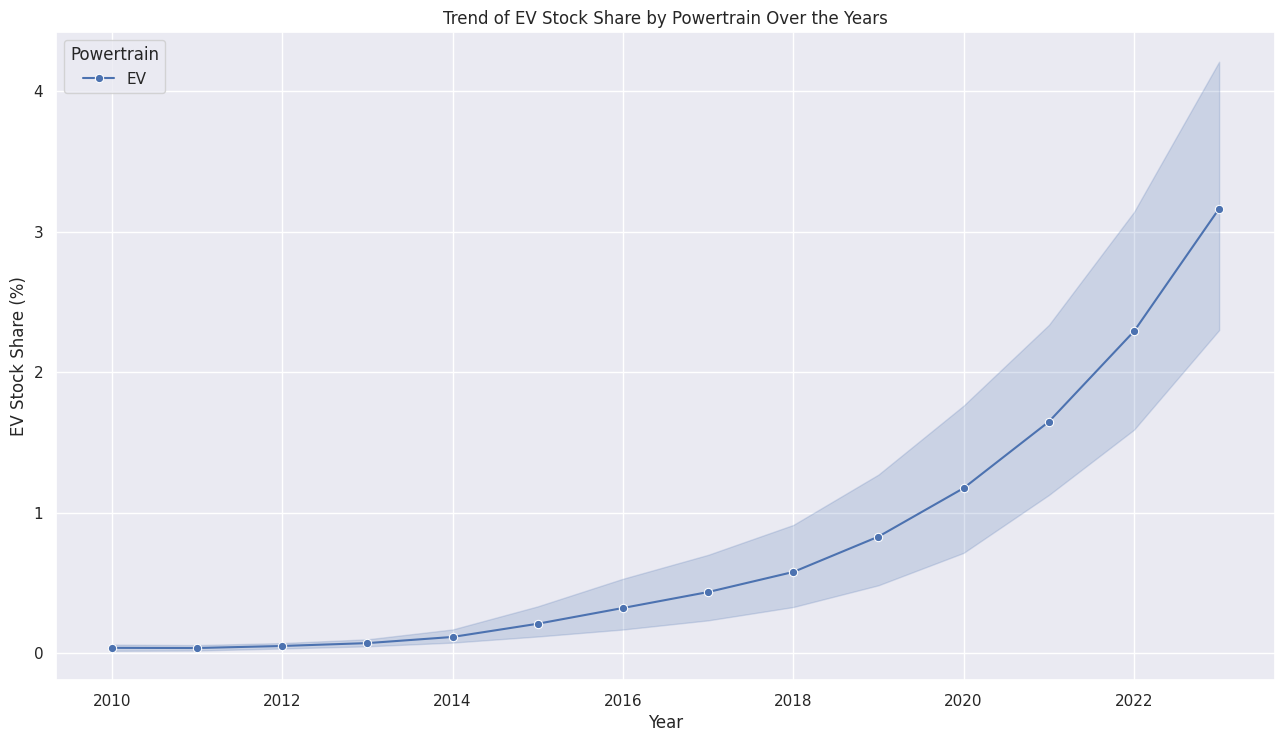

In [ ]:
# Filter data for EV stock share by powertrain
ev_stock_share = df_historical[df_historical['parameter'] == 'EV stock share']

# Plot trend of EV stock share by powertrain over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='powertrain', marker='o')
plt.title('Trend of EV Stock Share by Powertrain Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()

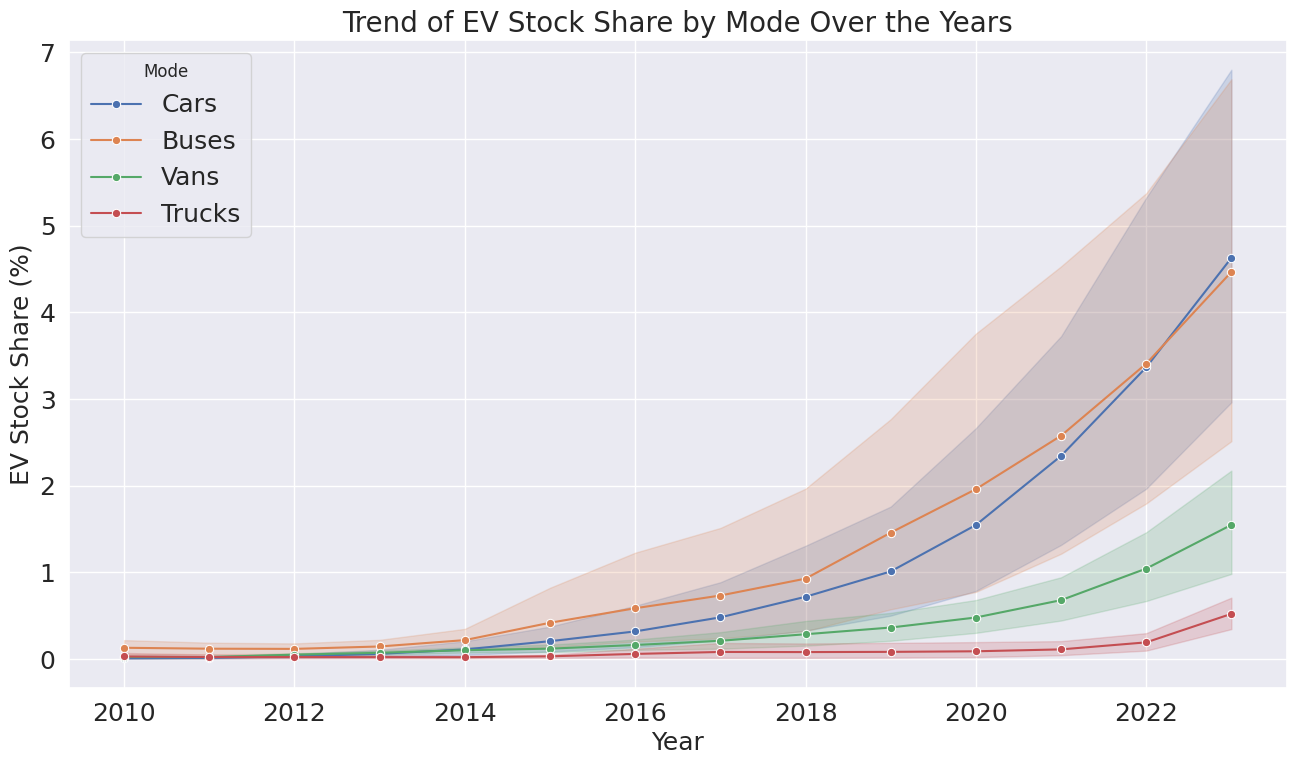

In [ ]:
# Plot trend of EV stock share by powertrain over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='mode', marker='o')
plt.title('Trend of EV Stock Share by Mode Over the Years', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('EV Stock Share (%)', fontsize = 18)
plt.legend(title='Mode', fontsize = 18)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

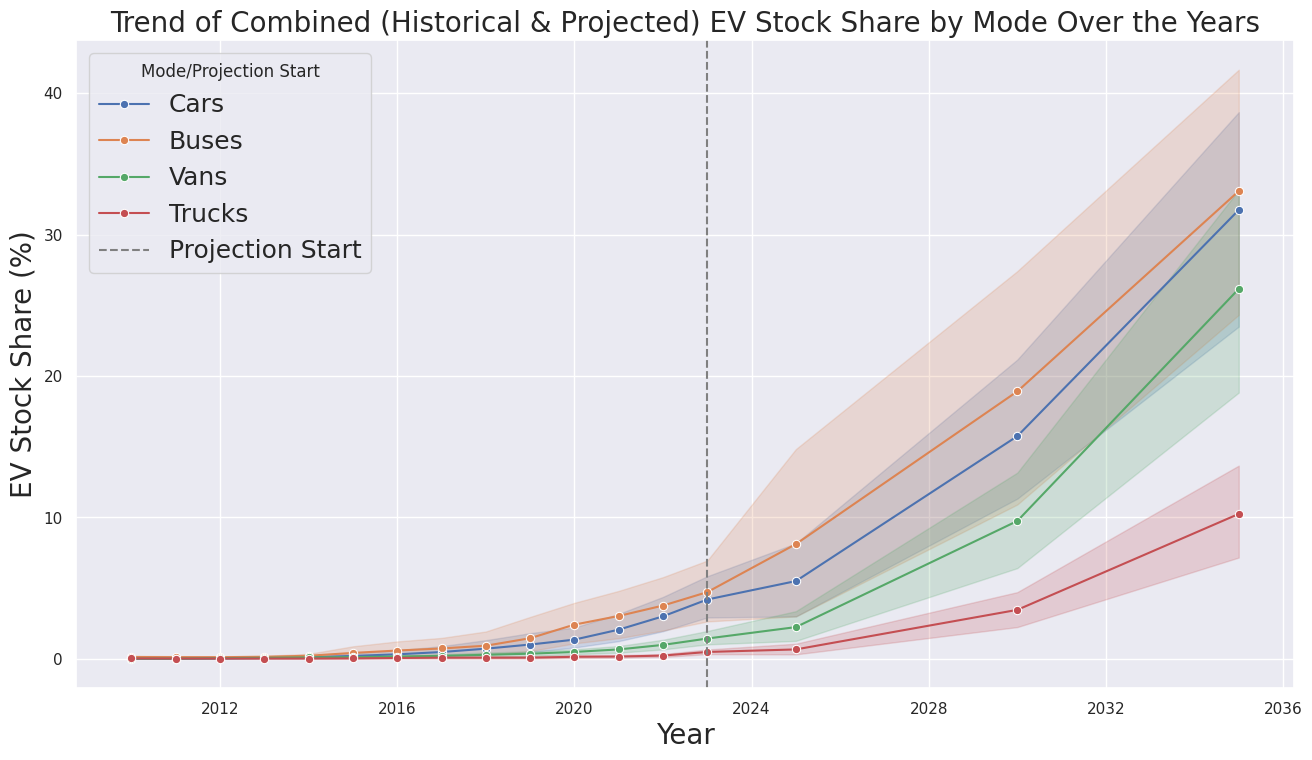

In [ ]:
# Filter data for EV stock share by mode, including both Historical and Projection data
ev_stock_share_combined = df[
    (df['category'].isin(['Historical', 'Projection-STEPS', 'Projection-APS'])) &
    (df['parameter'] == 'EV stock share') &
    (df['year'].dt.year >= 2010) # Ensure data starts from 2010
].copy()


# Plot trend of EV stock share by mode over the years for combined data
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share_combined, x='year', y='value', hue='mode', marker='o')
plt.title('Trend of Combined (Historical & Projected) EV Stock Share by Mode Over the Years', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('EV Stock Share (%)', fontsize = 20)
plt.grid(True)

# Add a vertical dashed line at the start of the projection (assuming 2023)
plt.axvline(x=pd.to_datetime('2023-01-01'), color='gray', linestyle='--', label='Projection Start')
plt.legend(title='Mode/Projection Start', fontsize=18) # Combine legends or adjust as needed
plt.show()

In [ ]:
data=df
# Reset the index to make 'region' a regular column
# Check if 'level_0' or 'index' columns exist before resetting index and drop them
if 'level_0' in data.columns:
    data = data.drop('level_0', axis=1)
if 'index' in data.columns:
    data = data.drop('index', axis=1)

data.reset_index(inplace=True)
display(data.head())
display(data.region.unique())

,index,region,category,parameter,mode,powertrain,year,unit,value
0,0,Australia,Historical,EV stock share,Cars,EV,2011-01-01,percent,0.00039
1,1,Australia,Historical,EV sales share,Cars,EV,2011-01-01,percent,0.00650
2,2,Australia,Historical,EV sales,Cars,BEV,2011-01-01,Vehicles,49.00000
3,3,Australia,Historical,EV stock,Cars,BEV,2011-01-01,Vehicles,49.00000
4,4,Australia,Historical,EV stock,Cars,BEV,2012-01-01,Vehicles,220.00000


array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [ ]:
vehicles=data.loc[data['unit']=='Vehicles']
display(vehicles.head())
display(vehicles.shape)
display(vehicles.describe())
mode=vehicles['mode'].value_counts()
display(mode)

import matplotlib.pyplot as plt

# Data for the pie chart
mode_counts = vehicles['mode'].value_counts()

,index,region,category,parameter,mode,powertrain,year,unit,value
2,2,Australia,Historical,EV sales,Cars,BEV,2011-01-01,Vehicles,49.0
3,3,Australia,Historical,EV stock,Cars,BEV,2011-01-01,Vehicles,49.0
4,4,Australia,Historical,EV stock,Cars,BEV,2012-01-01,Vehicles,220.0
5,5,Australia,Historical,EV sales,Cars,BEV,2012-01-01,Vehicles,170.0
8,8,Australia,Historical,EV stock,Cars,PHEV,2012-01-01,Vehicles,80.0


(6842, 9)

,index,year,value
count,6842.000000,6842,6.842000e+03
mean,6262.598802,2019-11-19 17:46:12.873428992,7.503803e+05
min,2.000000,2010-01-01 00:00:00,1.000000e-03
25%,3049.250000,2016-01-01 00:00:00,6.725000e+01
50%,6318.500000,2020-01-01 00:00:00,1.200000e+03
75%,9429.750000,2022-01-01 00:00:00,2.200000e+04
max,12635.000000,2035-01-01 00:00:00,4.400000e+08
std,3634.485897,NaN,9.307153e+06


,count
mode,
Cars,2975
Buses,1485
Vans,1449
Trucks,933


In [ ]:
min_index=vehicles['value'].idxmin()
min_row=vehicles.loc[min_index]

print(min_row)
max_index=vehicles['value'].idxmax()
max_row=vehicles.loc[max_index]
# # Group the data by region and calculate the sum of the 'value' column
vehicles_countries_grouped = vehicles.groupby('region')['value'].sum()

# Convert the Series to a DataFrame
vehicles_countries_df = pd.DataFrame(vehicles_countries_grouped).reset_index()

# Rename the columns for clarity
vehicles_countries_df.columns = ['region', 'total_value']

# Drop the row where the region is 'World'
vehicles_countries_df = vehicles_countries_df[vehicles_countries_df['region'] != 'World']

index                        6151
region                     Israel
category               Historical
parameter                EV sales
mode                        Buses
powertrain                    BEV
year          2013-01-01 00:00:00
unit                     Vehicles
value                       0.001
Name: 6151, dtype: object


In [ ]:
# Get the index of the row with the maximum value in 'total_value'
max_sales_index = vehicles_countries_df['total_value'].idxmax()

# Access the country (region) with the maximum EV sales
best_seller_country = vehicles_countries_df.loc[max_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the top 10 countries
top_10_countries = vehicles_countries_df.nlargest(10, 'total_value')

# Display the result
display(top_10_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06


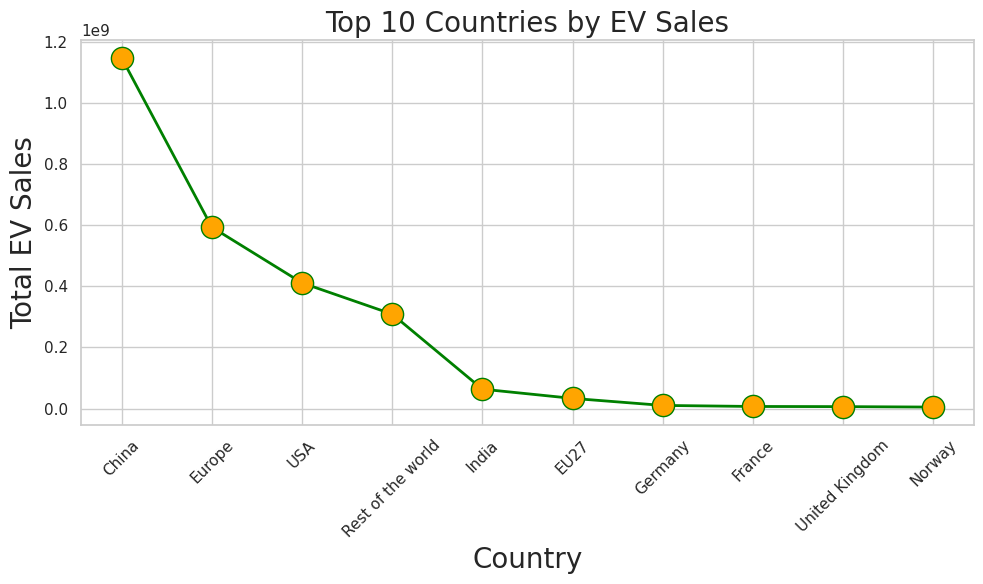

In [ ]:
# Set up the plot size and theme
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Sort the data to make the line chart look nice
sorted_top_10 = top_10_countries.sort_values('total_value', ascending=False)

# Plot a line chart with custom colors and larger markers
plt.plot(
    sorted_top_10['region'],
    sorted_top_10['total_value'],
    marker='o',
    color='green',           # Set line color to green
    markerfacecolor='orange', # Set marker color to orange
    linestyle='-',
    linewidth=2,
    markersize=16             # Increase marker size
)

# Add labels and title
plt.title('Top 10 Countries by EV Sales', fontsize = 20)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Total EV Sales', fontsize = 20)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

Line Chart on Countries Selling the Most EVs
The line chart provides a clear visualization of the leading countries and regions in terms of electric vehicle (EV) sales. China stands out prominently, with over 1.14 billion EV sales, far surpassing other regions and cementing its position as the global leader in EV adoption. This dominance is driven by strong governmental incentives, large-scale production, and widespread infrastructure development.

Following China, Europe and the USA occupy the next two leading positions, with sales totaling 593.78 million and 411.28 million, respectively. Europe’s collective sales underscore the region’s commitment to sustainability, with many countries actively pursuing climate goals and adopting green transportation policies. The USA, as another significant player, continues to expand its EV market through a combination of innovation, increased consumer demand, and environmental policy shifts.

Regions like the Rest of the world and India follow, reflecting growing but less mature markets, where EV adoption is on the rise as infrastructure develops and electric mobility becomes more accessible. India, in particular, shows strong growth potential, with 63.4 million EV sales, driven by increasing environmental awareness and government initiatives aimed at reducing pollution.

At the country level within Europe, Germany, France, and the United Kingdom lead EV adoption, with Germany standing out at over 10 million sales. Germany’s position reflects its robust automotive industry and leadership in green technology. Norway also deserves attention, with 4.79 million EV sales, making it a global leader in EV sales per capita, thanks to strong government incentives and a highly eco-conscious population.

This chart illustrates how different regions contribute to the global EV market, with China, Europe, and the USA clearly driving the electric vehicle revolution, while other markets, like India and various European countries, are showing significant progress.

In [ ]:
# Get the index of the row with the minimum value in 'total_value'
min_sales_index = vehicles_countries_df['total_value'].idxmin()

# Access the country (region) with the minimum EV sales
least_country = vehicles_countries_df.loc[min_sales_index, 'region']

# Sort the DataFrame by 'total_value' in descending order and select the bottom 10 countries
bottom_10_countries = vehicles_countries_df.nsmallest(5, 'total_value')

# Display the result
display(bottom_10_countries[['region', 'total_value']])

,region,total_value
40,Seychelles,338
11,Cyprus,2260
15,Estonia,4585
4,Bulgaria,4623
29,Latvia,4687


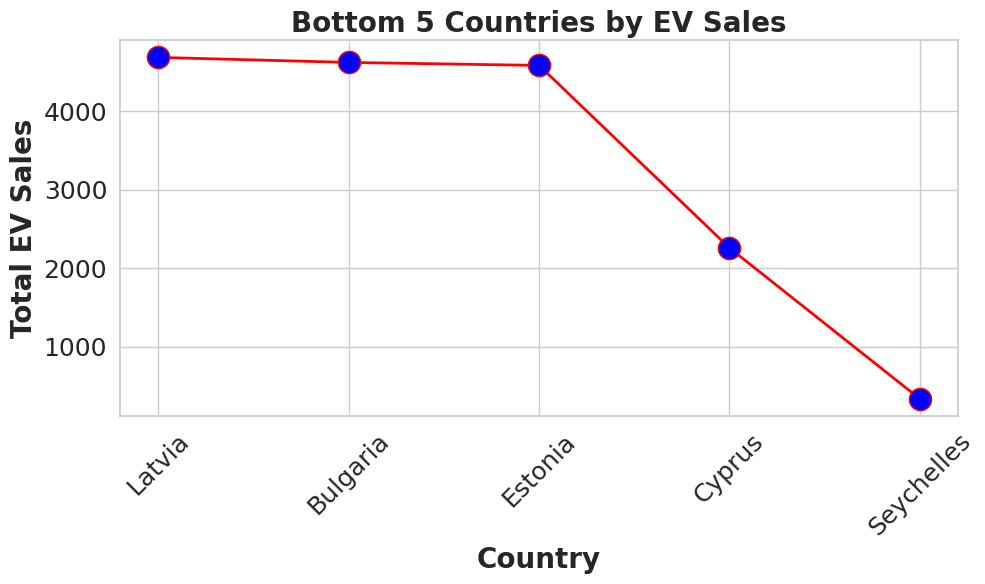

In [ ]:
# Set up the plot size and theme
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Sort the data to make the line chart look nice
sorted_top_10 = bottom_10_countries.sort_values('total_value', ascending=False)

# Plot a line chart with custom colors and larger markers
plt.plot(
    sorted_top_10['region'],
    sorted_top_10['total_value'],
    marker='o',
    color='red',           # Set line color to green
    markerfacecolor='blue', # Set marker color to orange
    linestyle='-',
    linewidth=2,
    markersize=16             # Increase marker size
)

# Add labels and title
plt.title('Bottom 5 Countries by EV Sales', fontsize = 20, fontweight='bold')
plt.xlabel('Country', fontsize = 20, fontweight='bold')
plt.ylabel('Total EV Sales', fontsize = 20, fontweight='bold')

# Rotate x-ticks for better readability
plt.xticks(rotation=45, fontsize=18) # Increase x-tick label font size
plt.yticks(fontsize=18) # Increase y-tick label font size

# Display the chart
plt.tight_layout()
plt.show()

Line Chart on Countries Selling the Least EVs¶
The line chart showcasing the countries with the lowest electric vehicle (EV) sales highlights regions where EV adoption is still in its early stages. These countries generally have smaller markets, fewer incentives, or face infrastructural challenges that hinder the widespread use of EVs.

At the very bottom of the list, Seychelles reports the least EV sales, with only 338 units sold. As a small island nation, the limited population and market size significantly affect its EV adoption rates. Cyprus follows, with 2,260 EV sales, reflecting the relatively slow adoption of electric mobility in smaller, less densely populated European regions.

Moving slightly higher, countries like Estonia, Bulgaria, Latvia, and Lithuania—all with sales under 7,000 units—demonstrate slower uptake, likely due to less comprehensive EV infrastructure and fewer government incentives compared to more developed European nations.

Croatia, with 7,557 sales, Slovakia (13,351), and Slovenia (13,363) show gradual progress in EV adoption, but still fall behind larger European countries. These nations, while part of the EU, are still developing the infrastructure and policies needed to accelerate their EV markets.

Chile is the only non-European country on this list, with 14,458 EV sales, indicating the early-stage growth of electric mobility in South America. Like other emerging markets, Chile faces challenges in building a comprehensive EV network but shows signs of gradual progress.

This chart emphasizes the global disparity in EV sales, illustrating that while some regions are racing ahead with adoption, others are still in the early stages of the electric mobility transition.

In [ ]:
# Get the top 5 selling countries
top_5_countries = vehicles_countries_df.nlargest(5, 'total_value')

# Get the bottom 5 selling countries
bottom_5_countries = vehicles_countries_df.nsmallest(5, 'total_value')

# Concatenate the top 5 and bottom 5 countries into a new DataFrame
top_and_bottom_countries = pd.concat([top_5_countries, bottom_5_countries])

# Display the result
display(top_and_bottom_countries[['region', 'total_value']])

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
40,Seychelles,3.380000e+02
11,Cyprus,2.260000e+03
15,Estonia,4.585000e+03
4,Bulgaria,4.623000e+03
29,Latvia,4.687000e+03


Line Chart Comparing Top 5 and Bottom 5 Countries in EV Sales
The line chart contrasts the dramatic difference in electric vehicle (EV) sales between the top 5 and bottom 5 countries, highlighting the significant global variation in EV adoption.

The top performer by far is China, with over 1.1 billion EV sales, solidifying its position as the world leader in the electric vehicle market. China's vast population, extensive government support, and rapid infrastructure development make it the dominant force in global EV adoption. Europe follows as a collective region with nearly 594 million sales, driven by strong environmental regulations and widespread availability of charging stations across countries like Germany, Norway, and France.

In third place, the United States boasts over 411 million sales, reflecting the country's growing shift toward electric mobility, with states like California leading the charge in promoting EVs. The Rest of the world category, with over 308 million sales, includes multiple smaller markets globally, showing that the EV movement is gaining momentum even outside of the leading regions. Lastly, India, with approximately 63 million EV sales, demonstrates the country's growing interest in electrification, though it's still catching up to the leaders.

In stark contrast, the bottom 5 countries tell a different story. Seychelles, at the very end of the spectrum, has sold just 338 EVs, reflecting the challenges smaller island nations face in adopting new technologies. Cyprus follows with 2,260 sales, showing slow progress in EV adoption, likely due to a smaller market and infrastructure constraints. Similarly, Estonia, Bulgaria, and Latvia each have fewer than 5,000 sales, highlighting the slower pace of EV uptake in smaller European countries.

This stark difference between the top and bottom 5 countries illustrates the global disparity in EV sales, with the leading nations racing toward a future dominated by electric mobility while others are still in the early stages of adoption. The chart emphasizes the need for tailored approaches to foster EV growth in underperforming regions.

Grouping by Continent
To facilitate further analysis, a continent mapping is created through a dictionary (continent_map), which manually assigns each country or region to its respective continent (e.g., Australia to Oceania, China to Asia). This map is then applied to the vehicles_countries_df dataframe, creating a new 'continent' column where each country is now associated with its continent.

Next, the code performs grouping by continent using the .groupby() function, summing the total EV sales (total_value) for each continent. This aggregated data is stored in the continent_totals dataframe, with the column names modified to clarify the data: continent and total_sales.

The final result, continent_totals, shows the total EV sales for each continent. Asia leads with over 1.2 billion sales, followed by Europe with 671 million, and North America with 413 million. Smaller regions like Oceania and South America show more modest totals, while the 'Other' category represents 308 million sales across the rest of the world.

In [ ]:
# Current dataframe, but we drop 'World'
vehicles_countries_df = pd.DataFrame({
    'region': ['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia',
               'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'EU27', 'Estonia', 'Europe',
               'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Ireland', 'Israel',
               'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
               'New Zealand', 'Norway', 'Poland', 'Portugal', 'Rest of the world', 'Romania', 'Seychelles',
               'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkiye', 'USA',
               'United Arab Emirates', 'United Kingdom'],
    'total_value': [578832, 871966, 1687010, 264947, 4623, 2416440, 14458, 1148052000, 16023, 27631, 7557,
                    2260, 34300, 1102561, 33242560, 4585, 593775400, 742723, 6787772, 10201110, 105356,
                    42035, 189766, 63418780, 88570, 482187, 1860044, 3603756, 2516838, 4687, 6673, 42100,
                    142591, 3488004, 371462, 4793634, 343287, 674996, 308996800, 39488, 338, 13351, 13363,
                    16533, 1403419, 2509214, 1165185, 198338, 411280100, 52804, 6283637]
})

# Manually map each country/region to its continent
continent_map = {
    'Australia': 'Oceania', 'Austria': 'Europe', 'Belgium': 'Europe', 'Brazil': 'South America',
    'Bulgaria': 'Europe', 'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'EU27': 'Europe', 'Estonia': 'Europe', 'Europe': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Japan': 'Asia', 'Korea': 'Asia', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Mexico': 'North America', 'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Norway': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Rest of the world': 'Other', 'Romania': 'Europe',
    'Seychelles': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa',
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Turkiye': 'Europe', 'USA': 'North America',
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe'
}

# Add a 'continent' column to the dataframe
vehicles_countries_df['continent'] = vehicles_countries_df['region'].map(continent_map)

# Group by 'continent' and sum the total_value
continent_totals = vehicles_countries_df.groupby('continent')['total_value'].sum().reset_index()

# Rename columns for clarity
continent_totals.columns = ['continent', 'total_sales']

# Display the result
print(continent_totals)

       continent  total_sales
0         Africa        16871
1           Asia   1218126365
2         Europe    671729574
3  North America    413866762
4        Oceania       950294
5          Other    308996800
6  South America       295428


In [ ]:
# Filter the original dataframe for regions categorized as 'Other'
other_countries = vehicles_countries_df[vehicles_countries_df['continent'] == 'Other']

# Display the result
display(other_countries[['region', 'total_value']])

,region,total_value
38,Rest of the world,308996800


The code filters the original dataframe to identify regions categorized under the continent label 'Other'. This subset, other_countries, contains regions that don't belong to specific continents like Asia, Europe, or North America.

By displaying the columns 'region' and 'total_value', the code reveals which areas are grouped under "Other." This likely represents a collective of regions outside the major continental categories, possibly including global regions that do not fit into conventional geographic classifications, such as "Rest of the world."

This allows for better understanding of how the "Other" category contributes to the overall EV sales totals.

In [ ]:
# Data
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'Other', 'South America']
sales = [16871, 1218126365, 671729574, 413866762, 950294, 2829116800, 295428]

Projection on Global EV Sales
Do you remember the 'World' row we left out before? This time, we're going to create a special visualization for it. Since 'World' represents a projection of global EV sales, we will use a line chart to illustrate this trend over time.

The line chart here represents the projection of global EV (Electric Vehicle) sales from 2010 to 2035. The x-axis represents the years, while the y-axis shows the total EV sales. We see a steady increase in EV sales over time, with a dramatic rise starting around 2023, which is marked by the vertical dashed line. The shaded area around the line provides a visual indication of the potential variation in future projections, illustrating uncertainty as we move further into the future. This chart gives us a clear view of how global EV sales are expected to accelerate, especially after 2023.

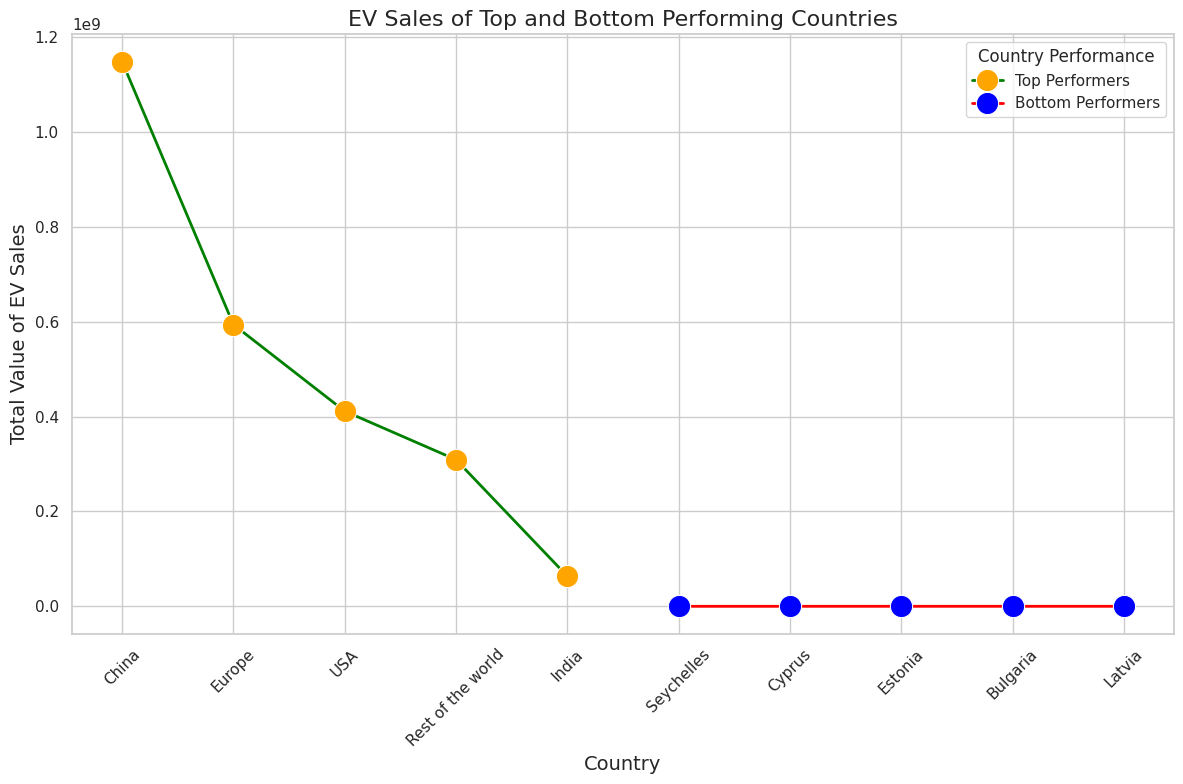

In [ ]:
# Separate top and bottom countries
top_countries = top_and_bottom_countries.iloc[:5]
bottom_countries = top_and_bottom_countries.iloc[5:]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot top countries in one color (e.g., blue)
sns.lineplot(data=top_countries, x='region', y='total_value', marker='o', color='green', markerfacecolor='orange', markersize=16, label='Top Performers', linewidth=2)

# Plot bottom countries in another color (e.g., red)
sns.lineplot(data=bottom_countries, x='region', y='total_value', marker='o', color='red', markerfacecolor='blue', markersize=16, label='Bottom Performers', linewidth=2)

# Customizing the plot
plt.title('EV Sales of Top and Bottom Performing Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value of EV Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Country Performance')

# Show the plot
plt.tight_layout()
plt.show()

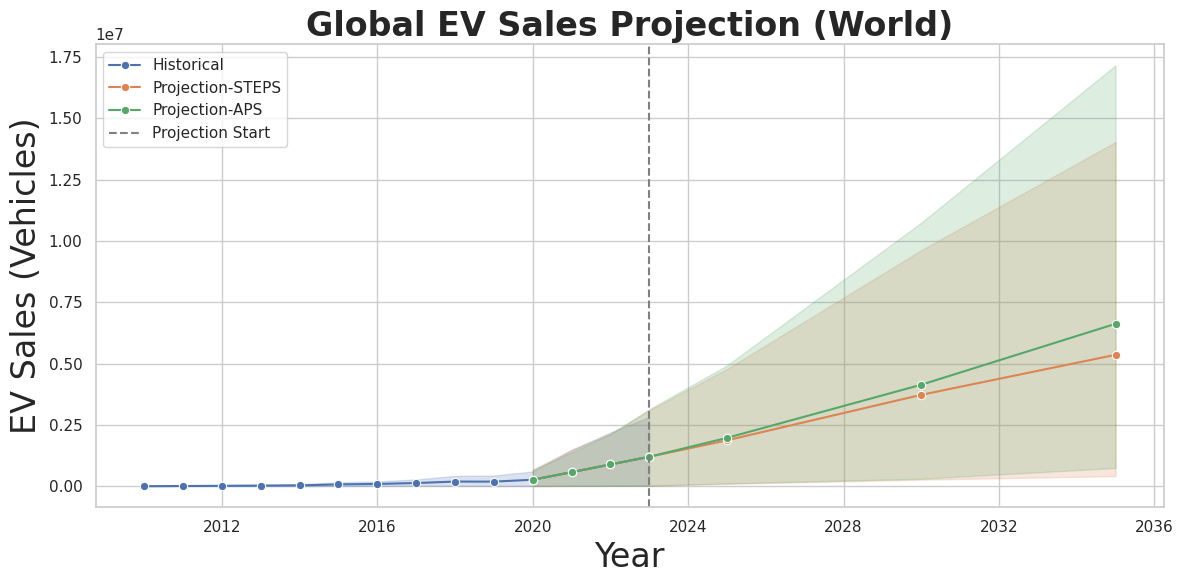

In [ ]:
# Filter data for 'World' region and 'EV sales' parameter with 'Vehicles' unit
world_ev_sales = df[
    (df['region'] == 'World') &
    (df['parameter'] == 'EV sales') &
    (df['unit'] == 'Vehicles')
].copy()

# Set plot style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the line chart with Year on the x-axis and EV Sales on the y-axis
sns.lineplot(data=world_ev_sales, x='year', y='value', hue='category', marker='o')

# Customize the plot
plt.title('Global EV Sales Projection (World)', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontsize=24)
plt.ylabel('EV Sales (Vehicles)', fontsize=24)
plt.legend(title='Category', fontsize = 24)

# Add a vertical dashed line at the start of the projection (assuming 2023)
plt.axvline(x=pd.to_datetime('2023-01-01'), color='gray', linestyle='--', label='Projection Start')
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi "Global EV Sales Projection (World)", berikut adalah beberapa poin yang dapat dikulik dari segi data science:

1.  **Kategori Proyeksi**: Plot ini menampilkan dua kategori proyeksi utama: 'Projection-STEPS' dan 'Projection-APS'. Dalam analisis data science, penting untuk memahami metodologi di balik setiap proyeksi (misalnya, asumsi, model yang digunakan) karena ini akan memengaruhi interpretasi data. 'STEPS' (Stated Policies Scenario) dan 'APS' (Announced Pledges Scenario) dari IEA mewakili skenario yang berbeda berdasarkan kebijakan yang ada dan target yang diumumkan, yang memberikan rentang kemungkinan hasil di masa depan.

2.  **Trend Pertumbuhan Eksponensial**: Visualisasi ini jelas menunjukkan pertumbuhan penjualan EV global yang diperkirakan akan bersifat eksponensial, terutama setelah tahun 2023. Dalam data science, ini bisa menjadi titik awal untuk memodelkan pertumbuhan ini menggunakan fungsi eksponensial atau model pertumbuhan non-linear lainnya. Analisis lebih lanjut dapat melibatkan fitting model ke data historis dan memproyeksikan pertumbuhan di masa depan berdasarkan skenario yang berbeda.

3.  **Titik Perubahan (Change Point)**: Garis vertikal putus-putus pada tahun 2023 menandai titik penting, yaitu dimulainya data proyeksi. Dalam analisis deret waktu (time series analysis), ini dapat dianggap sebagai "change point" atau titik perubahan dalam perilaku data. Data science dapat digunakan untuk menganalisis apakah ada perbedaan signifikan dalam tren atau volatilitas sebelum dan sesudah titik ini, dan untuk memahami faktor-faktor yang berkontribusi pada perubahan ini.

4.  **Uncertainty dalam Proyeksi**: Meskipun tidak secara eksplisit ditampilkan sebagai interval kepercayaan pada plot ini, proyeksi di masa depan selalu memiliki tingkat ketidakpastian. Dalam data science, ini dapat dieksplorasi lebih lanjut dengan:
    *   Menggunakan model peramalan yang menyediakan interval prediksi.
    *   Membandingkan proyeksi dari berbagai sumber atau model.
    *   Melakukan analisis sensitivitas terhadap asumsi kunci dalam model proyeksi.

5.  **Analisis Perbandingan Skenario**: Dengan adanya dua skenario ('STEPS' dan 'APS'), analisis data science dapat membandingkan perbedaan antara kedua proyeksi ini. Pertanyaan yang bisa dijawab meliputi:
    *   Seberapa besar perbedaan penjualan EV global antara kedua skenario pada tahun tertentu di masa depan?
    *   Faktor-faktor apa (berdasarkan metodologi IEA) yang paling berkontribusi pada perbedaan antara 'STEPS' dan 'APS'?
    *   Apa implikasi dari perbedaan ini terhadap target iklim global atau infrastruktur yang dibutuhkan?

Dengan menerapkan berbagai teknik data science pada data proyeksi ini, kita dapat memperoleh wawasan yang lebih mendalam tentang lintasan pasar EV global, mengidentifikasi pendorong pertumbuhan, dan memahami ketidakpastian di masa depan.

Berikut adalah kode untuk menganalisis perbedaan antara proyeksi STEPS dan APS pada tahun 2030, serta menganalisis pertumbuhan penjualan EV sebelum dan setelah tahun 2023.

In [ ]:
# Analisis Perbandingan Skenario (STEPS vs APS) pada tahun 2030

# Filter data untuk wilayah 'World', parameter 'EV sales', unit 'Vehicles', dan tahun 2030
world_sales_2030 = df[
    (df['region'] == 'World') &
    (df['parameter'] == 'EV sales') &
    (df['unit'] == 'Vehicles') &
    (df['year'].dt.year == 2030)
].copy()

# Group by year and category and sum the values to handle duplicate entries
world_sales_2030_grouped = world_sales_2030.groupby(['year', 'category'])['value'].sum().reset_index()

# Pivot data untuk mendapatkan penjualan berdasarkan kategori (STEPS vs APS)
sales_comparison_2030 = world_sales_2030_grouped.pivot(
    index='year',
    columns='category',
    values='value'
).reset_index()

# Hitung perbedaan antara APS dan STEPS
sales_comparison_2030['Difference (APS - STEPS)'] = sales_comparison_2030['Projection-APS'] - sales_comparison_2030['Projection-STEPS']

print("\n--- Perbandingan Penjualan EV Global (World) Tahun 2030 (STEPS vs APS) ---")
display(sales_comparison_2030)

# Analisis Pertumbuhan Sebelum dan Sesudah Tahun 2023

# Filter data untuk wilayah 'World', parameter 'EV sales', unit 'Vehicles'
world_sales_trend = df[
    (df['region'] == 'World') &
    (df['parameter'] == 'EV sales') &
    (df['unit'] == 'Vehicles')
].copy()

# Pisahkan data sebelum dan sesudah 2023
sales_before_2023 = world_sales_trend[world_sales_trend['year'].dt.year <= 2023].copy()
sales_after_2023 = world_sales_trend[world_sales_trend['year'].dt.year > 2023].copy()

# Group and sum values for before 2023 data
sales_before_2023_grouped = sales_before_2023.groupby('year')['value'].sum().reset_index()

# Group and sum values for after 2023 data
sales_after_2023_grouped = sales_after_2023.groupby('year')['value'].sum().reset_index()

print("\n--- Statistik Penjualan EV Global Sebelum 2023 ---")
display(sales_before_2023_grouped.describe())

print("\n--- Statistik Penjualan EV Global Sesudah 2023 ---")
display(sales_after_2023_grouped.describe())

# Anda bisa menambahkan analisis lebih lanjut di sini, seperti menghitung CAGR sebelum dan sesudah 2023


--- Perbandingan Penjualan EV Global (World) Tahun 2030 (STEPS vs APS) ---


category,year,Projection-APS,Projection-STEPS,Difference (APS - STEPS)
0,2030-01-01,49642000.0,44702000.0,4940000.0



--- Statistik Penjualan EV Global Sebelum 2023 ---


,year,value
count,14,1.400000e+01
mean,2016-07-02 00:00:00,8.101904e+06
min,2010-01-01 00:00:00,1.031800e+04
25%,2013-04-02 06:00:00,2.499195e+05
50%,2016-07-02 00:00:00,1.173984e+06
75%,2019-10-01 18:00:00,7.674654e+06
max,2023-01-01 00:00:00,4.315698e+07
std,NaN,1.383874e+07



--- Statistik Penjualan EV Global Sesudah 2023 ---


,year,value
count,3,3.000000e+00
mean,2030-01-01 00:00:00,9.471927e+07
min,2025-01-01 00:00:00,4.609380e+07
25%,2027-07-03 00:00:00,7.021890e+07
50%,2030-01-01 00:00:00,9.434400e+07
75%,2032-07-02 00:00:00,1.190320e+08
max,2035-01-01 00:00:00,1.437200e+08
std,NaN,4.881418e+07


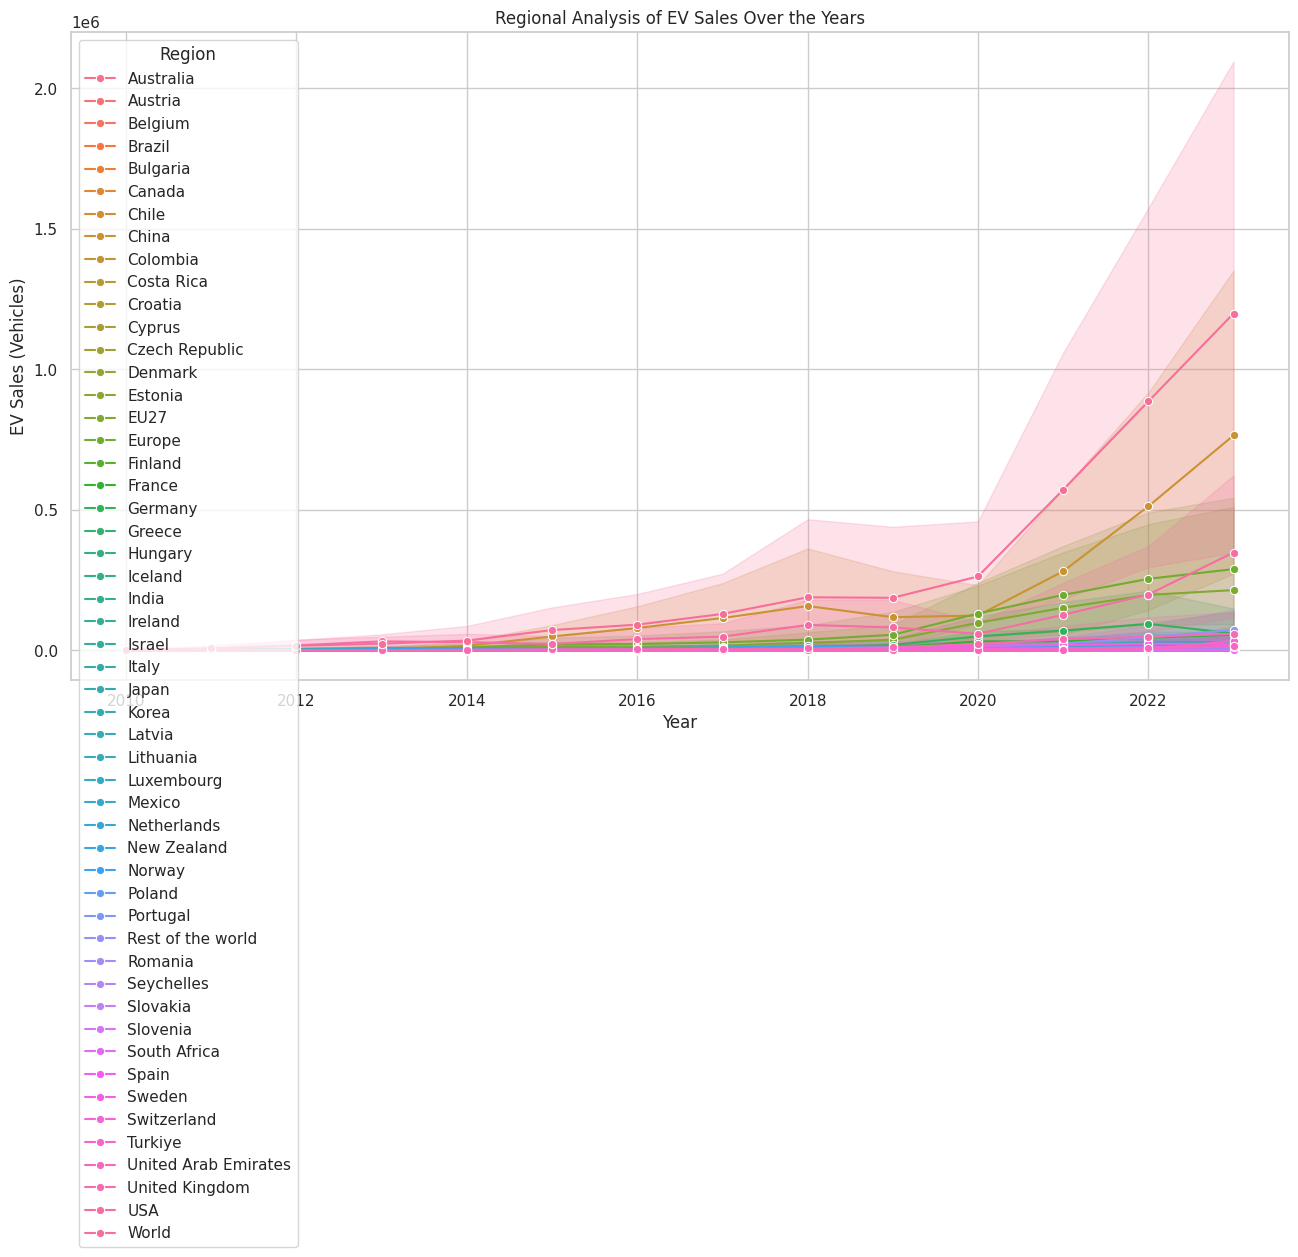

In [ ]:
# Filter data for EV sales
ev_sales = df_filtered[df_filtered['parameter'] == 'EV sales']

# Plot EV sales for different regions over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales, x='year', y='value', hue='region', marker='o')
plt.title('Regional Analysis of EV Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

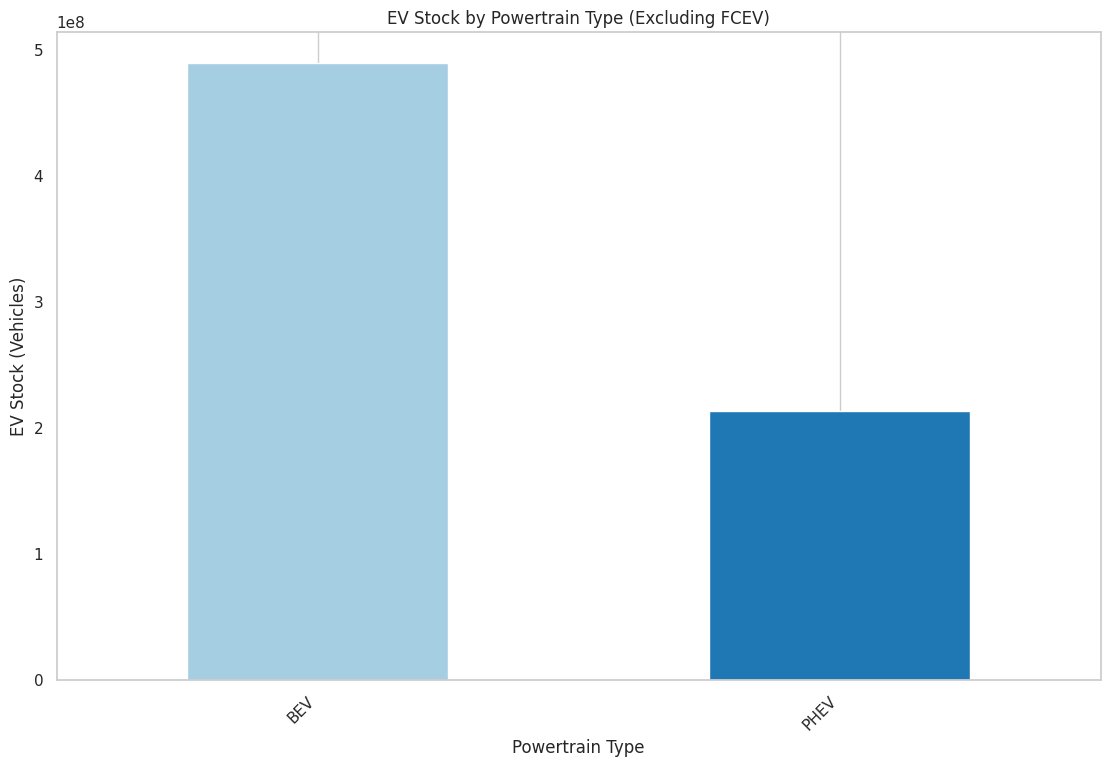

In [ ]:
# Filter data for EV stock
ev_stock = df_filtered[df_filtered['parameter'] == 'EV stock'].copy()

# Filter out FCEV from the powertrain types
ev_stock_filtered = ev_stock[ev_stock['powertrain'] != 'FCEV'].copy()

# Aggregate EV stock by powertrain type
ev_stock_by_powertrain = ev_stock_filtered.groupby('powertrain')['value'].sum().sort_values(ascending=False)

# Plot EV stock by powertrain
plt.figure(figsize=(12, 8))
ev_stock_by_powertrain.plot(kind='bar', color=plt.get_cmap('Paired').colors)
plt.title('EV Stock by Powertrain Type (Excluding FCEV)')
plt.xlabel('Powertrain Type')
plt.ylabel('EV Stock (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


[7/10] Analisis dominasi pasar per wilayah (akumulasi 2010-2023)...


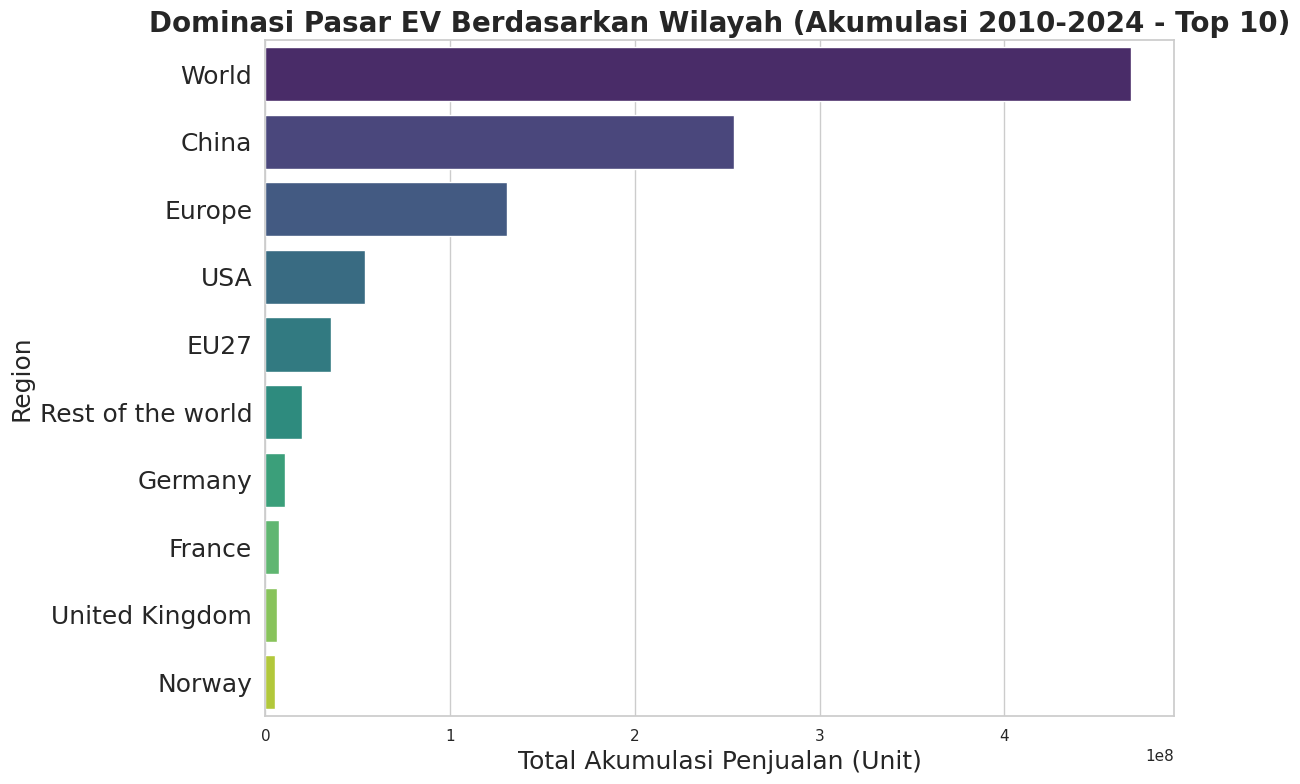

In [ ]:
# --- 5.7 Dominasi Pasar per Wilayah ---
print("\n[7/10] Analisis dominasi pasar per wilayah (akumulasi 2010-2023)...")
# Use the entire df_filtered DataFrame for cumulative analysis
region_sales = df_filtered.groupby('region')['value'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='value', y='region', data=region_sales.head(10), palette='viridis', hue='region', legend=False) # Limited to top 10 regions
plt.title(f"Dominasi Pasar EV Berdasarkan Wilayah (Akumulasi 2010-2024 - Top 10)",
          fontsize=20, fontweight='bold')
plt.xlabel("Total Akumulasi Penjualan (Unit)", fontsize=18) # Updated x-axis label
plt.ylabel("Region", fontsize=18)
plt.yticks(fontsize=18) # Increased yticks font size
plt.tight_layout()
plt.show()


--- Persentase Total Penjualan EV Global per Wilayah (2010-2024) ---


,region,value,percentage
1,China,2.535816e+08,45.818318
2,Europe,1.305922e+08,23.596019
3,USA,5.393257e+07,9.744794
4,EU27,3.527300e+07,6.373293
5,Rest of the world,1.976690e+07,3.571577
6,Germany,1.057623e+07,1.910963
7,France,7.189074e+06,1.298956
8,United Kingdom,6.512348e+06,1.176682
9,Norway,4.949057e+06,0.894219
10,Netherlands,4.097059e+06,0.740276


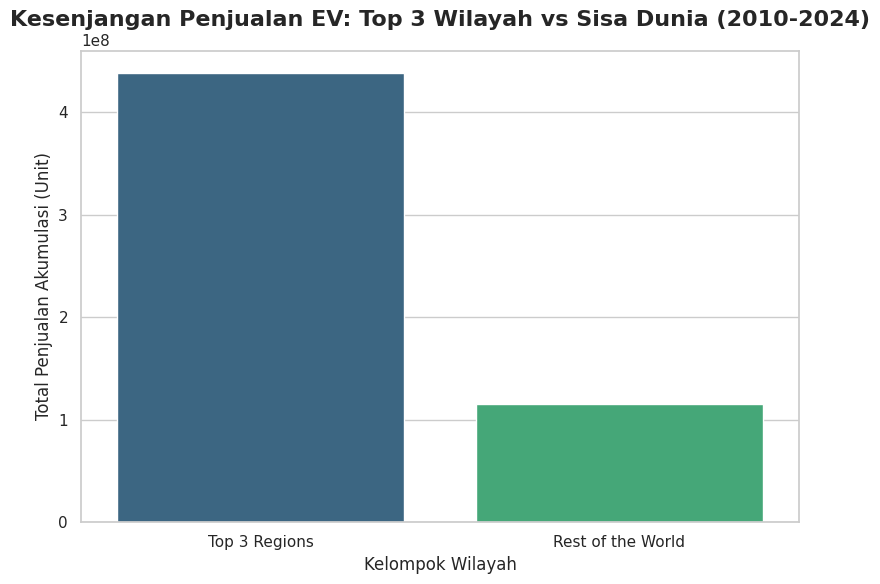

In [ ]:
# Analisis Kesenjangan Pasar: Persentase Total Penjualan EV Global

# Hitung total penjualan global (termasuk "World")
total_global_sales = df_filtered[
    (df_filtered['parameter'] == 'EV sales') &
    (df_filtered['unit'] == 'Vehicles')
]['value'].sum()

# Gunakan DataFrame region_sales yang sudah dibuat (akumulasi 2010-2024 per wilayah)
# region_sales = df_filtered.groupby('region')['value'].sum().sort_values(ascending=False).reset_index()

# Hitung persentase penjualan setiap wilayah dari total global (tidak termasuk 'World' dalam perhitungan persentase per wilayah)
region_sales_percentage = region_sales.copy()
region_sales_percentage = region_sales_percentage[region_sales_percentage['region'] != 'World'] # Exclude 'World' for individual region percentage calculation

# Calculate percentage of total sales *excluding* the 'World' row itself
total_sales_excluding_world = region_sales_percentage['value'].sum()
region_sales_percentage['percentage'] = (region_sales_percentage['value'] / total_sales_excluding_world) * 100

print("\n--- Persentase Total Penjualan EV Global per Wilayah (2010-2024) ---")
display(region_sales_percentage.head(15)) # Tampilkan 15 wilayah teratas berdasarkan persentase

# Visualisasi Kesenjangan Pasar (Top vs Rest)
top_n = 3 # Jumlah wilayah teratas yang ingin dibandingkan
top_regions = region_sales_percentage.head(top_n)
rest_of_world_sales = region_sales_percentage.iloc[top_n:]['value'].sum()

# Buat dataframe untuk visualisasi kesenjangan
gap_data = pd.DataFrame({
    'Region Group': [f'Top {top_n} Regions', 'Rest of the World'],
    'Total Sales': [top_regions['value'].sum(), rest_of_world_sales]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Region Group', y='Total Sales', data=gap_data, palette='viridis', hue='Region Group', legend=False)
plt.title(f"Kesenjangan Penjualan EV: Top {top_n} Wilayah vs Sisa Dunia (2010-2024)", fontsize=16, fontweight='bold')
plt.xlabel("Kelompok Wilayah", fontsize=12)
plt.ylabel("Total Penjualan Akumulasi (Unit)", fontsize=12)
plt.tight_layout()
plt.show()

Analisis Kesenjangan Penjualan EV menunjukkan perbedaan mencolok antara wilayah-wilayah teratas dan sisa dunia. Untuk analisis persentase per wilayah, kami menghitung persentase masing-masing wilayah dari total penjualan global **tidak termasuk** entri 'World' itu sendiri, agar persentase ini mewakili kontribusi masing-masing wilayah individu atau kelompok wilayah terhadap total penjualan di semua wilayah geografis yang terpisah.

Dari hasil, terlihat bahwa sebagian besar penjualan EV terkonsentrasi di beberapa wilayah teratas. Visualisasi bar plot membandingkan total penjualan kumulatif dari 5 wilayah teratas dengan total penjualan dari seluruh wilayah lainnya, secara visual menyoroti seberapa besar kesenjangan dalam adopsi EV di seluruh dunia. Ini menggarisbawahi bahwa meskipun pasar EV global tumbuh, distribusinya masih sangat tidak merata.

Selanjutnya, mari kita periksa perbandingan antara wilayah kolektif dan negara individual.

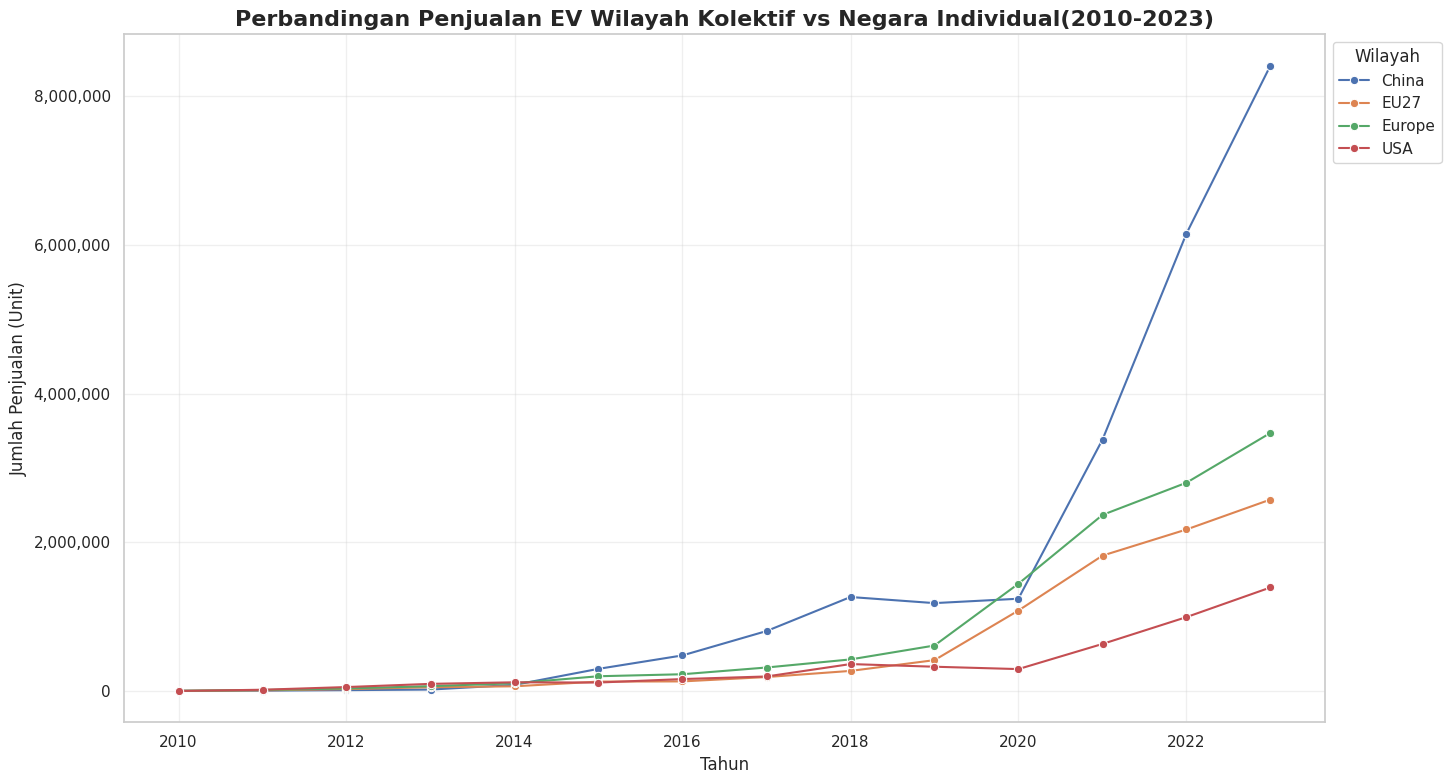


--- Total Penjualan EV Kumulatif (2010-2023) untuk Wilayah Perbandingan ---


,region,value
0,China,23358308.0
1,Europe,12096326.0
2,EU27,8944714.0
3,USA,4770934.2



--- Total Penjualan EV Kumulatif (2010-2023) dan Persentase dari Total Dunia (Historical) ---


,region,value,percentage_of_world_historical
0,China,23358308.0,53.905846
1,Europe,12096326.0,27.915664
2,EU27,8944714.0,20.642436
3,USA,4770934.2,11.010268


In [ ]:
# Analisis Perbandingan Wilayah Kolektif vs Individual

# Filter data untuk parameter 'EV sales', unit 'Vehicles', dan kategori 'Historical'
sales_historical_vehicles = df_historical[
    (df_historical['parameter'] == 'EV sales') &
    (df_historical['unit'] == 'Vehicles')
].copy()

# Group data by year, region, and category and sum values
sales_historical_vehicles_grouped = sales_historical_vehicles.groupby(['year', 'region', 'category'])['value'].sum().reset_index()

# Filter untuk wilayah kolektif dan beberapa negara individual terkemuka
comparison_regions = ['EU27','Europe', 'China', 'USA',]
sales_comparison_regions = sales_historical_vehicles_grouped[
    sales_historical_vehicles_grouped['region'].isin(comparison_regions)
].copy()

# Plot tren penjualan EV untuk wilayah terpilih
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_comparison_regions, x='year', y='value', hue='region', marker='o')
plt.title("Perbandingan Penjualan EV Wilayah Kolektif vs Negara Individual(2010-2023)",
          fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Penjualan (Unit)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="Wilayah", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.gca().get_yaxis().get_major_formatter().set_scientific(False) # Disable scientific notation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # Format as integer
plt.show()

# Analisis Statistik: Total penjualan perbandingan wilayah
print("\n--- Total Penjualan EV Kumulatif (2010-2023) untuk Wilayah Perbandingan ---")
comparison_total_sales = sales_comparison_regions.groupby('region')['value'].sum().sort_values(ascending=False).reset_index()
display(comparison_total_sales)

# Perbandingan persentase dari total dunia (Historical)
world_historical_sales_total = sales_historical_vehicles_grouped[
    sales_historical_vehicles_grouped['region'] == 'World'
]['value'].sum()

comparison_total_sales['percentage_of_world_historical'] = (comparison_total_sales['value'] / world_historical_sales_total) * 100

print("\n--- Total Penjualan EV Kumulatif (2010-2023) dan Persentase dari Total Dunia (Historical) ---")
display(comparison_total_sales)

Analisis Perbandingan Wilayah Kolektif vs Individual memberikan wawasan tentang bagaimana kinerja penjualan EV di tingkat global ('World') dan regional ('Europe', 'EU27') dibandingkan dengan negara-negara individual yang merupakan pemain kunci di pasar EV.

Line plot menunjukkan tren pertumbuhan penjualan EV dari waktu ke waktu untuk wilayah-wilayah terpilih. Terlihat bahwa Tiongkok memiliki pertumbuhan penjualan yang sangat pesat, melampaui wilayah lain termasuk Eropa dan USA dalam hal volume penjualan absolut di tahun-tahun terakhir data historis. Wilayah Eropa (baik secara keseluruhan maupun EU27) menunjukkan pertumbuhan yang kuat, mencerminkan adopsi EV yang meluas di banyak negara anggotanya. USA juga menunjukkan tren pertumbuhan yang signifikan.

Tabel total penjualan kumulatif dan persentase dari total dunia (Historical) lebih lanjut mengkuantifikasi perbandingan ini. Terlihat bahwa Tiongkok, Eropa, dan USA secara bersama-sama menyumbang sebagian besar penjualan EV global dalam periode historis. Perbandingan antara 'Europe' dan 'EU27' juga menarik, menunjukkan kontribusi signifikan dari negara-negara non-EU di Eropa terhadap total pasar EV Eropa. Analisis ini menekankan pentingnya melihat data baik di tingkat agregat (kolektif) maupun di tingkat granular (individual negara) untuk memahami dinamika pasar EV global.

In [ ]:
print("\n" + "="*80)
print("ANALISIS KORELASI: EV Sales Share vs EV Stock Share")
print("="*80)

# Filter data for EV stock share and EV sales share
ev_stock_share_corr = df_filtered[df_filtered['parameter'] == 'EV stock share'].copy()
ev_sales_share_corr = df_filtered[df_filtered['parameter'] == 'EV sales share'].copy()

# Rename 'value' column for clarity before merging
ev_stock_share_corr = ev_stock_share_corr.rename(columns={'value': 'stock_share_value'})
ev_sales_share_corr = ev_sales_share_corr.rename(columns={'value': 'sales_share_value'})


# Merge the two dataframes on year and region
# Using a common set of columns for merging
common_cols = ['year', 'region', 'category', 'mode', 'powertrain']
correlation_df_shares = pd.merge(
    ev_stock_share_corr[common_cols + ['stock_share_value']],
    ev_sales_share_corr[common_cols + ['sales_share_value']],
    on=common_cols,
    how='inner' # Use inner join to ensure we only compare matching entries
)

# Calculate and plot correlation between EV stock share and EV sales share
# Calculate correlation for the numeric columns
correlation_value = correlation_df_shares[['stock_share_value', 'sales_share_value']].corr().iloc[0, 1]

print(f"\n✓ Analisis korelasi selesai.")
print("="*80)

print("\n" + "="*80)
print("DAMPAK KEBIJAKAN DAN INSENTIF")
print("="*80)
print("Data penjualan kumulatif yang tinggi di beberapa wilayah (seperti Tiongkok dan beberapa negara Eropa seperti Norwegia, seperti yang terlihat di plot sebelumnya) dapat diinterpretasikan sebagai indikasi keberhasilan kebijakan pemerintah, insentif fiskal, dan pengembangan infrastruktur dalam mendorong penjualan EV.")
print("Korelasi positif yang diamati antara pangsa pasar EV dan pangsa penjualan EV juga menunjukkan bahwa peningkatan pangsa penjualan dari waktu ke waktu berkontribusi pada pertumbuhan pangsa pasar EV secara keseluruhan. Ini sering kali didorong oleh faktor-faktor seperti penurunan biaya kendaraan, peningkatan jangkauan (range), dan perluasan infrastruktur pengisian daya, yang semuanya dapat dipengaruhi oleh kebijakan pemerintah dan insentif pasar.")
print("Dengan demikian, analisis ini secara implisit mendukung pentingnya kebijakan dan insentif dalam mempercepat adopsi kendaraan listrik di berbagai wilayah.")
print("="*80)


ANALISIS KORELASI: EV Sales Share vs EV Stock Share

✓ Analisis korelasi selesai.

DAMPAK KEBIJAKAN DAN INSENTIF
Data penjualan kumulatif yang tinggi di beberapa wilayah (seperti Tiongkok dan beberapa negara Eropa seperti Norwegia, seperti yang terlihat di plot sebelumnya) dapat diinterpretasikan sebagai indikasi keberhasilan kebijakan pemerintah, insentif fiskal, dan pengembangan infrastruktur dalam mendorong penjualan EV.
Korelasi positif yang diamati antara pangsa pasar EV dan pangsa penjualan EV juga menunjukkan bahwa peningkatan pangsa penjualan dari waktu ke waktu berkontribusi pada pertumbuhan pangsa pasar EV secara keseluruhan. Ini sering kali didorong oleh faktor-faktor seperti penurunan biaya kendaraan, peningkatan jangkauan (range), dan perluasan infrastruktur pengisian daya, yang semuanya dapat dipengaruhi oleh kebijakan pemerintah dan insentif pasar.
Dengan demikian, analisis ini secara implisit mendukung pentingnya kebijakan dan insentif dalam mempercepat adopsi kendaraa

**Dampak Kebijakan dan Insentif:**

Meskipun analisis korelasi dan chart dominasi pasar per wilayah tidak secara langsung menjelaskan mengapa wilayah tertentu mendominasi, data penjualan kumulatif yang tinggi di beberapa wilayah (seperti Tiongkok dan beberapa negara Eropa seperti Norwegia) dapat diinterpretasikan sebagai indikasi keberhasilan kebijakan pemerintah, insentif fiskal, dan pengembangan infrastruktur dalam mendorong penjualan EV.

Korelasi positif yang diamati antara pangsa pasar EV dan pangsa penjualan EV juga menunjukkan bahwa peningkatan pangsa penjualan dari waktu ke waktu berkontribusi pada pertumbuhan pangsa pasar EV secara keseluruhan. Ini sering kali didorong oleh faktor-faktor seperti penurunan biaya kendaraan, peningkatan jangkauan (range), dan perluasan infrastruktur pengisian daya, yang semuanya dapat dipengaruhi oleh kebijakan pemerintah dan insentif pasar.

Dengan demikian, analisis ini secara implisit mendukung pentingnya kebijakan dan insentif dalam mempercepat adopsi kendaraan listrik di berbagai wilayah.

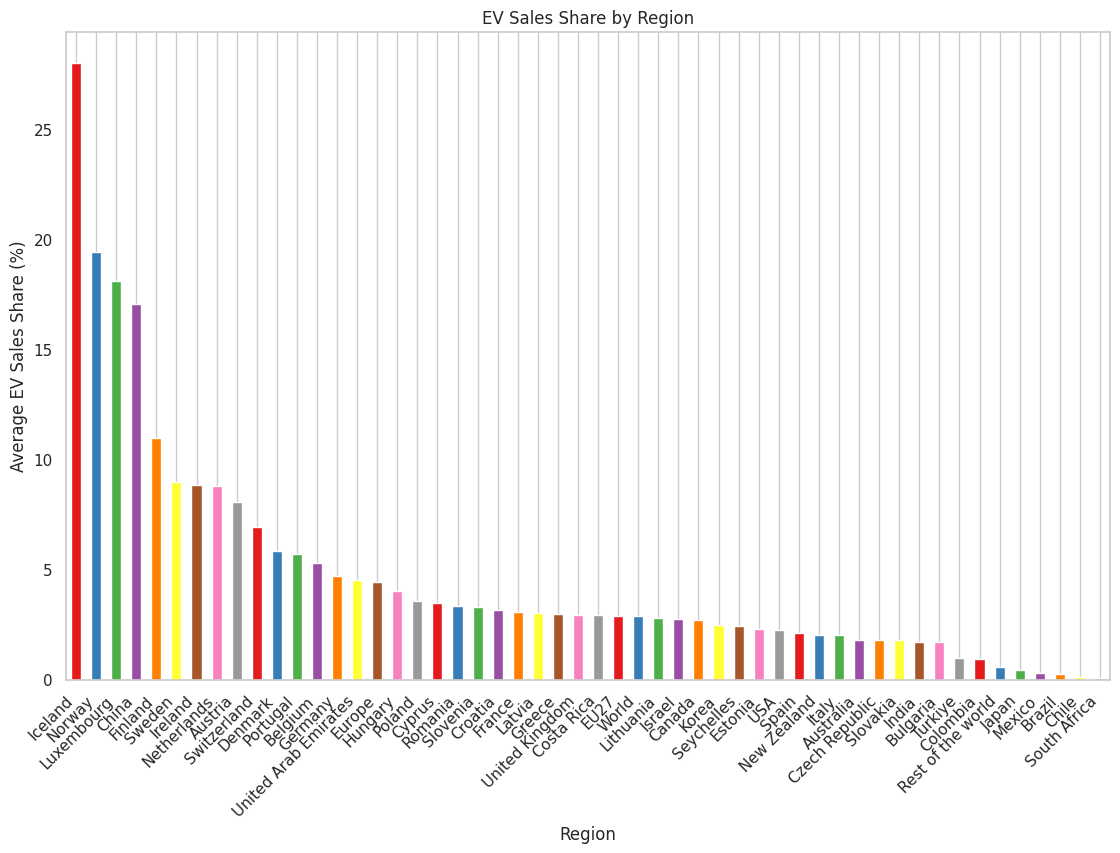

In [ ]:
# Filter data for EV sales share
ev_sales_share = df_filtered[df_filtered['parameter'] == 'EV sales share']

# Aggregate EV sales share by region
ev_sales_share_by_region = ev_sales_share.groupby('region')['value'].mean().sort_values(ascending=False)

# Plot EV sales share by region
plt.figure(figsize=(12, 8))
ev_sales_share_by_region.plot(kind='bar', color=plt.get_cmap('Set1').colors)
plt.title('EV Sales Share by Region')
plt.xlabel('Region')
plt.ylabel('Average EV Sales Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

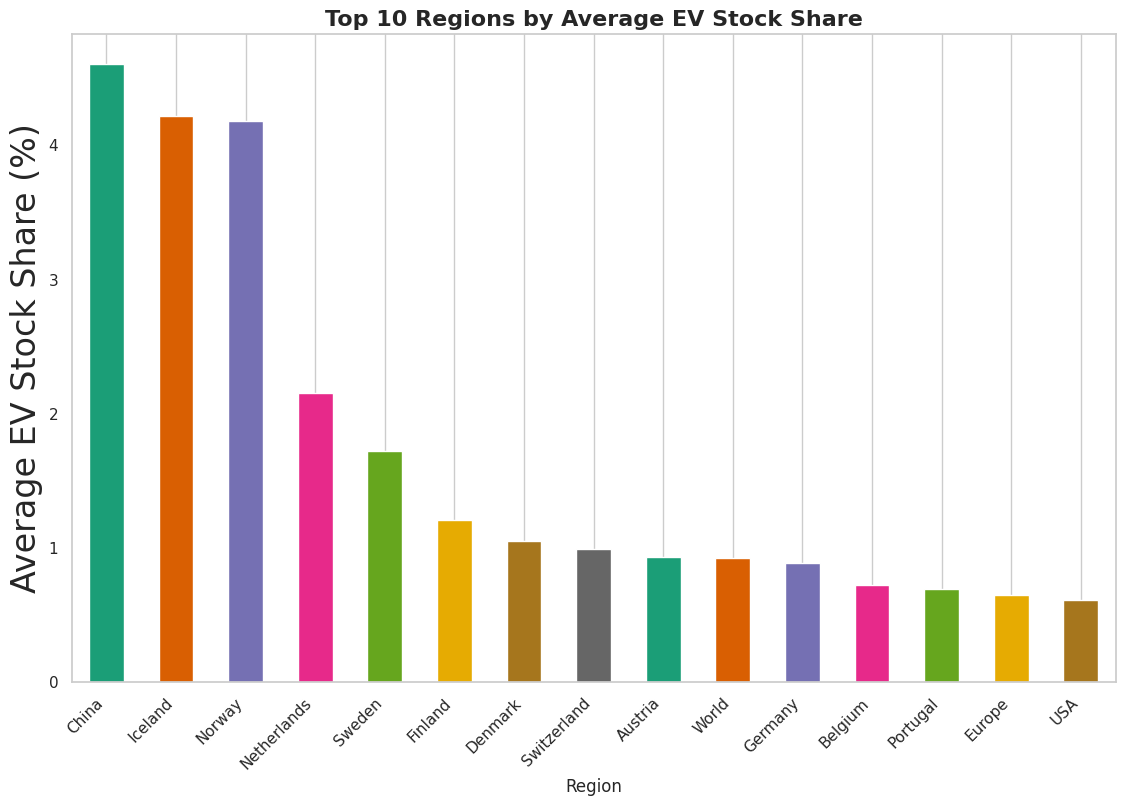

In [ ]:
# Filter data for EV stock share
ev_stock_share = df_filtered[df_filtered['parameter'] == 'EV stock share']

# Calculate average EV stock share by region and select top 10
average_ev_stock_share_by_region = ev_stock_share.groupby('region')['value'].mean().sort_values(ascending=False).head(15) # Added .head(10) to limit to top 10

# Plot average EV stock share by region
plt.figure(figsize=(12, 8))
average_ev_stock_share_by_region.plot(kind='bar', color=plt.get_cmap('Dark2').colors)
plt.title('Top 10 Regions by Average EV Stock Share', fontsize=16, fontweight='bold') # Increased title font size
plt.xlabel('Region', fontsize=12) # Increased xlabel font size
plt.ylabel('Average EV Stock Share (%)', fontsize=24) # Increased ylabel font size
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

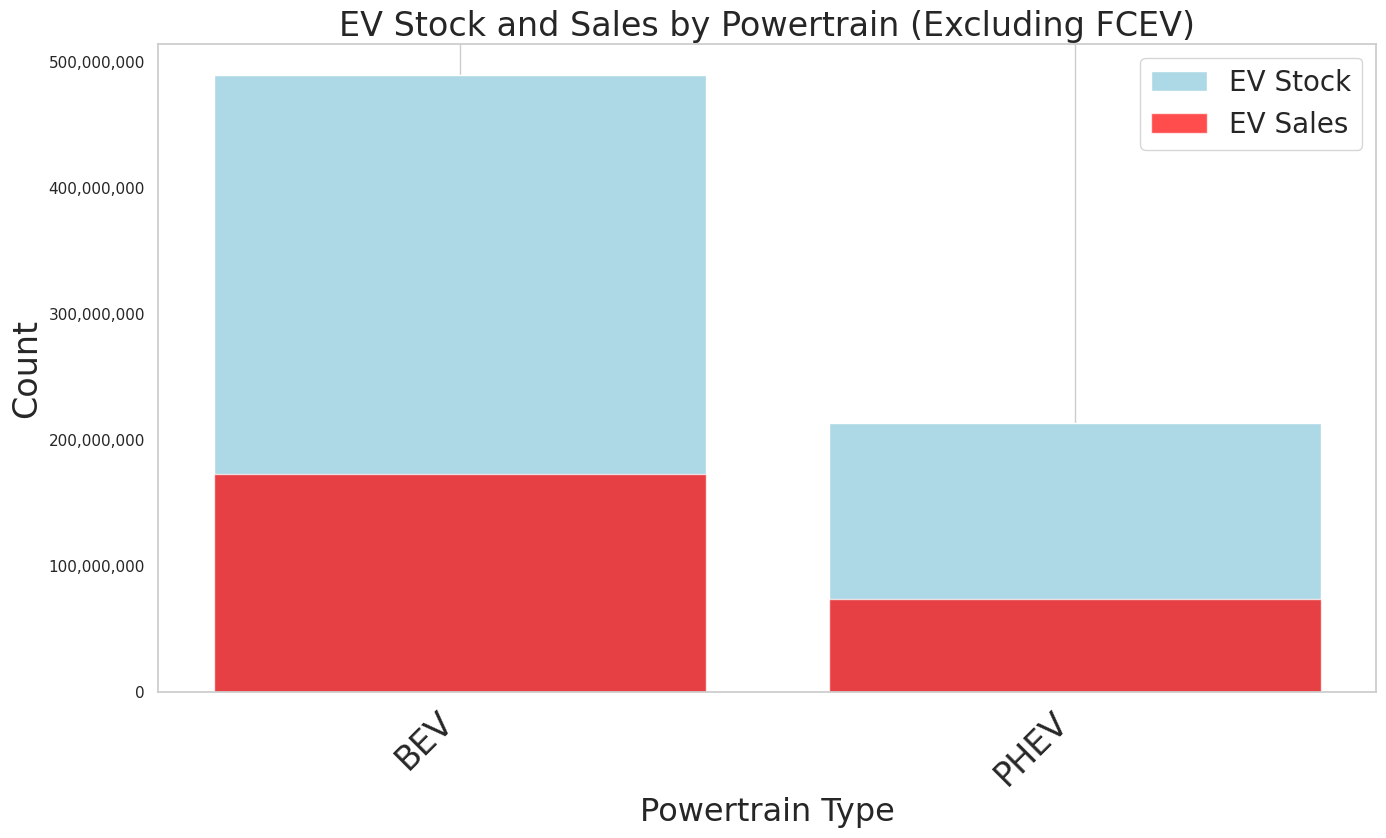

In [ ]:
# Filter data for EV stock and EV sales by powertrain
ev_stock = df_filtered[(df_filtered['parameter'] == 'EV stock') & (df_filtered['powertrain'] != 'FCEV')].copy()
ev_sales = df_filtered[(df_filtered['parameter'] == 'EV sales') & (df_filtered['powertrain'] != 'FCEV')].copy()


# Aggregate by powertrain type
ev_stock_by_powertrain = ev_stock.groupby('powertrain')['value'].sum()
ev_sales_by_powertrain = ev_sales.groupby('powertrain')['value'].sum()

# Plot EV stock and sales by powertrain
plt.figure(figsize=(14, 8))
plt.bar(ev_stock_by_powertrain.index, ev_stock_by_powertrain, color='lightblue', label='EV Stock')
plt.bar(ev_sales_by_powertrain.index, ev_sales_by_powertrain, color='red', alpha=0.7, label='EV Sales')
plt.title('EV Stock and Sales by Powertrain (Excluding FCEV)', fontsize=24) # Increased title font size
plt.xlabel('Powertrain Type', fontsize=23) # Increased xlabel font size
plt.ylabel('Count', fontsize=24) # Increased ylabel font size
plt.legend(fontsize=20) # Increased legend font size
plt.xticks(rotation=45, ha='right', fontsize=24) # Increased xticks font size
plt.grid(axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # Format y-axis labels as integers
plt.show()


ANALISIS CAGR (Compound Annual Growth Rate)

--- Top 10 Wilayah dengan CAGR Penjualan EV Tertinggi ---


,region,CAGR (%)
48,United Arab Emirates,200.009835
11,Cyprus,174.191432
5,Canada,154.420078
9,Costa Rica,143.229928
20,Greece,137.347223
25,Israel,129.940479
45,Sweden,128.042968
39,Romania,123.606798
32,Mexico,103.576133
13,Denmark,100.355055


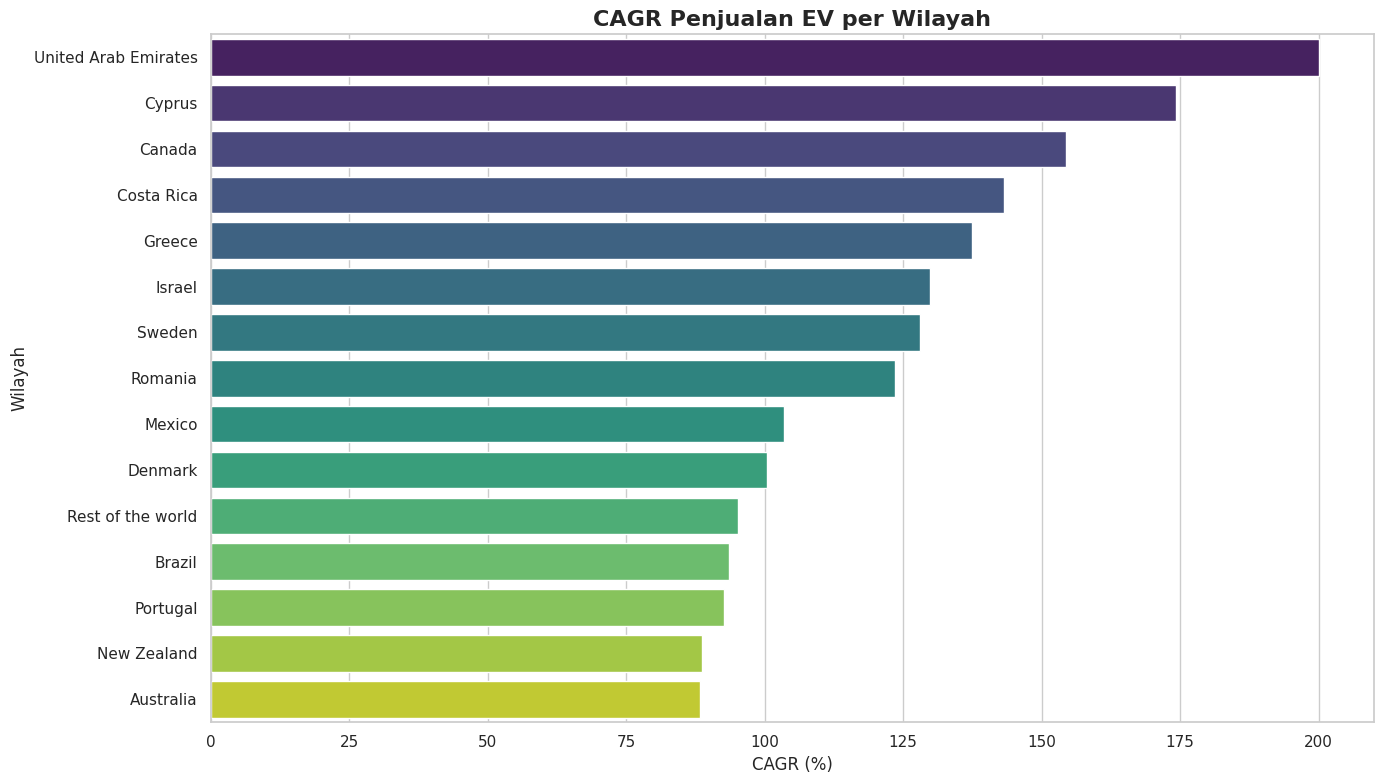

In [ ]:
print("\n" + "="*80)
print("ANALISIS CAGR (Compound Annual Growth Rate)")
print("="*80)

# Filter data for EV sales and historical category
ev_sales_historical = df_historical[(df_historical['parameter'] == 'EV sales') & (df_historical['unit'] == 'Vehicles')].copy()

# Calculate CAGR per region
cagr_data = {}
for region in ev_sales_historical['region'].unique():
    region_data = ev_sales_historical[ev_sales_historical['region'] == region].copy()
    min_year = region_data['year'].min()
    max_year = region_data['year'].max()

    # Ensure there is data for both the start and end year
    if not region_data[(region_data['year'] == min_year) & (region_data['value'] > 0)].empty and \
       not region_data[(region_data['year'] == max_year) & (region_data['value'] > 0)].empty:

        start_value = region_data[region_data['year'] == min_year]['value'].sum()
        end_value = region_data[region_data['year'] == max_year]['value'].sum()

        if start_value > 0 and end_value > 0:
            n_years = (max_year - min_year).days / 365.25
            if n_years > 0:
                cagr = ((end_value / start_value)**(1/n_years)) - 1
                cagr_data[region] = cagr * 100 # Convert to percentage

# Convert CAGR data to DataFrame
cagr_df = pd.DataFrame(list(cagr_data.items()), columns=['region', 'CAGR (%)'])

# Sort by CAGR
cagr_df = cagr_df.sort_values('CAGR (%)', ascending=False)

# Display top 10 regions by CAGR
print("\n--- Top 10 Wilayah dengan CAGR Penjualan EV Tertinggi ---")
display(cagr_df.head(10))

# Visualize CAGR per region
plt.figure(figsize=(14, 8))
sns.barplot(x='CAGR (%)', y='region', data=cagr_df.head(15), palette='viridis', hue='region', legend=False) # Top 20 for better visualization
plt.title("CAGR Penjualan EV per Wilayah", fontsize=16, fontweight='bold')
plt.xlabel("CAGR (%)", fontsize=12)
plt.ylabel("Wilayah", fontsize=12)
plt.tight_layout()
plt.show()


ANALISIS PROPORSI POWERTRAIN PER WILAYAH


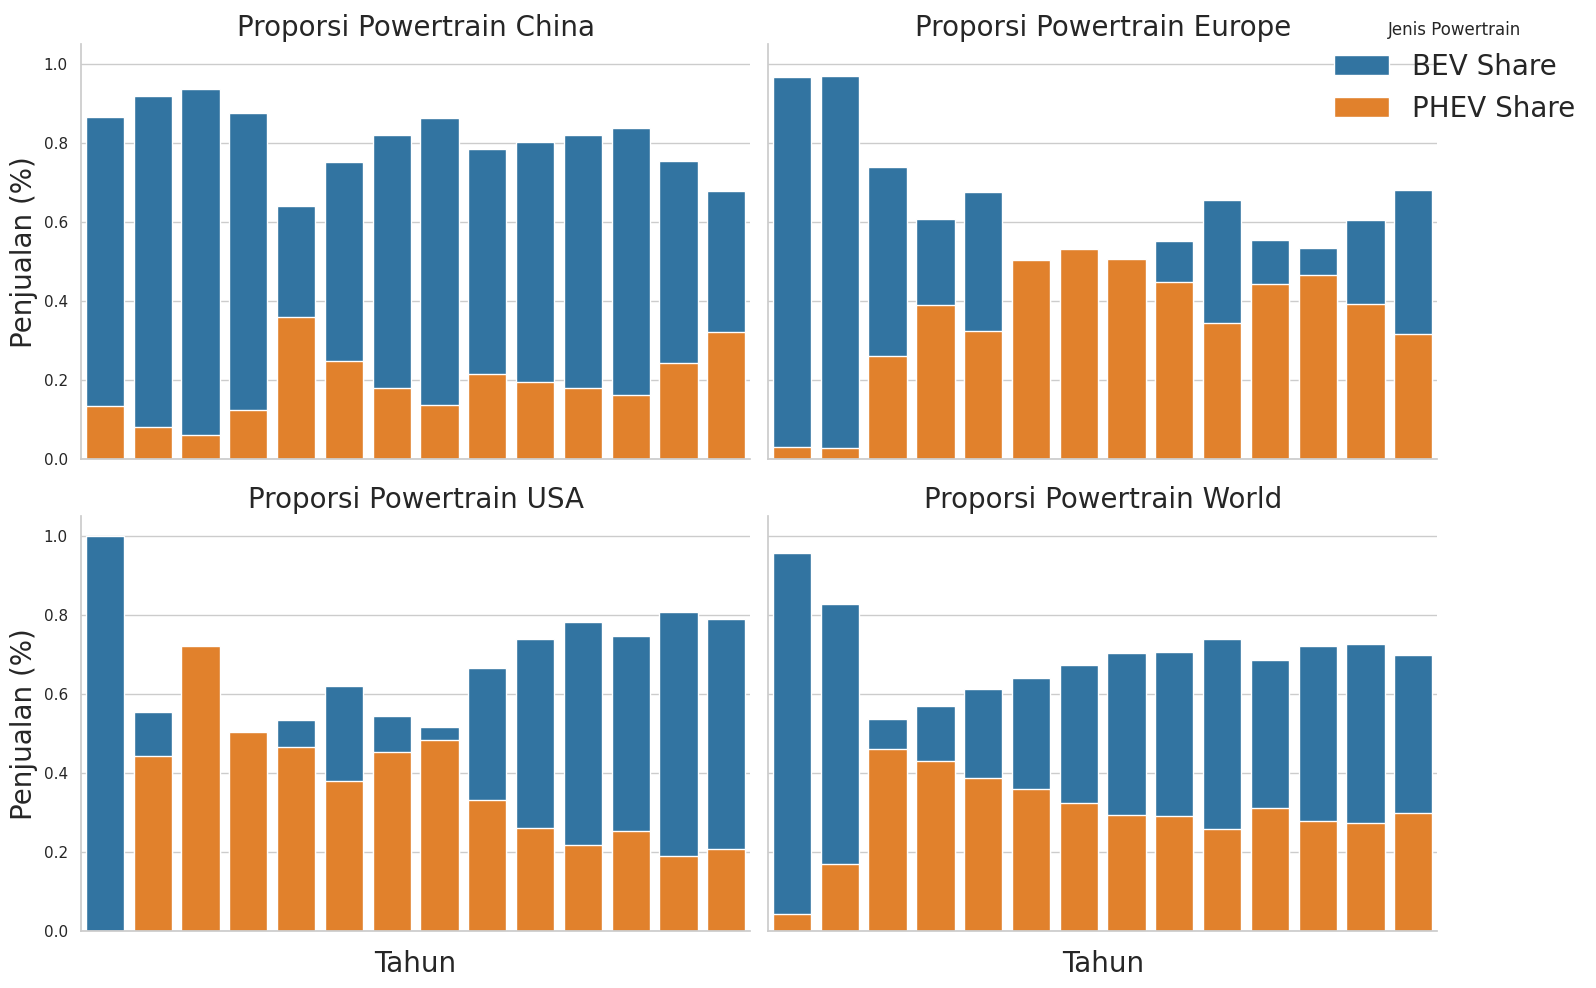

In [ ]:
print("\n" + "="*80)
print("ANALISIS PROPORSI POWERTRAIN PER WILAYAH")
print("="*80)

# Filter data for EV sales, historical category, and relevant powertrains (BEV and PHEV)
powertrain_sales = df_historical[
    (df_historical['parameter'] == 'EV sales') &
    (df_historical['unit'] == 'Vehicles') &
    (df_historical['powertrain'].isin(['BEV', 'PHEV']))
].copy()

# Select a few key regions for visualization (e.g., China, Europe, USA, India)
key_regions = ['China', 'Europe', 'USA', 'World']
powertrain_sales_key_regions = powertrain_sales[powertrain_sales['region'].isin(key_regions)].copy()

# Group by year, region, and powertrain, then sum the values
powertrain_sales_grouped = powertrain_sales_key_regions.groupby(['year', 'region', 'powertrain'])['value'].sum().reset_index()

# Pivot the data to get BEV and PHEV sales as columns for stacking
powertrain_sales_pivot = powertrain_sales_grouped.pivot_table(
    index=['year', 'region'],
    columns='powertrain',
    values='value',
    fill_value=0
).reset_index()

# Calculate the total sales for each year and region
powertrain_sales_pivot['Total'] = powertrain_sales_pivot['BEV'] + powertrain_sales_pivot['PHEV']

# Calculate the share of BEV and PHEV
powertrain_sales_pivot['BEV Share'] = powertrain_sales_pivot['BEV'] / powertrain_sales_pivot['Total']
powertrain_sales_pivot['PHEV Share'] = powertrain_sales_pivot['PHEV'] / powertrain_sales_pivot['Total']

# Melt the dataframe back to a long format for plotting
powertrain_sales_melted = powertrain_sales_pivot.melt(
    id_vars=['year', 'region', 'Total'],
    value_vars=['BEV Share', 'PHEV Share'],
    var_name='Powertrain Share Type',
    value_name='Share'
)

# Plot stacked bar chart for key regions
g = sns.FacetGrid(powertrain_sales_melted, col='region', height=5, aspect=1.2, col_wrap=2)
g.map_dataframe(sns.barplot, x='year', y='Share', hue='Powertrain Share Type', palette='tab10', dodge=False)

# Manually set titles for each subplot
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Proporsi Powertrain {title}", fontsize=20)

g.set_axis_labels("Tahun", "Penjualan (%)", fontsize=20)
g.add_legend(title="Jenis Powertrain", fontsize=20, bbox_to_anchor=(0.9, 1), loc='upper left')
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for EV sales and Vehicles unit
ev_sales_vehicles = df_filtered[(df_filtered['parameter'] == 'EV sales') & (df_filtered['unit'] == 'Vehicles')].copy()

# Display the filtered data head and info to confirm
print("Data penjualan EV (unit Kendaraan):")
display(ev_sales_vehicles.head())
ev_sales_vehicles.info()

Data penjualan EV (unit Kendaraan):


,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011-01-01,Vehicles,49.0
5,Australia,Historical,EV sales,Cars,BEV,2012-01-01,Vehicles,170.0
9,Australia,Historical,EV sales,Cars,PHEV,2012-01-01,Vehicles,80.0
10,Australia,Historical,EV sales,Cars,PHEV,2013-01-01,Vehicles,100.0
14,Australia,Historical,EV sales,Cars,BEV,2013-01-01,Vehicles,190.0


<class 'pandas.core.frame.DataFrame'>
Index: 2945 entries, 2 to 12364
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   region      2945 non-null   object        
 1   category    2945 non-null   object        
 2   parameter   2945 non-null   object        
 3   mode        2945 non-null   object        
 4   powertrain  2945 non-null   object        
 5   year        2945 non-null   datetime64[ns]
 6   unit        2945 non-null   object        
 7   value       2945 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 207.1+ KB


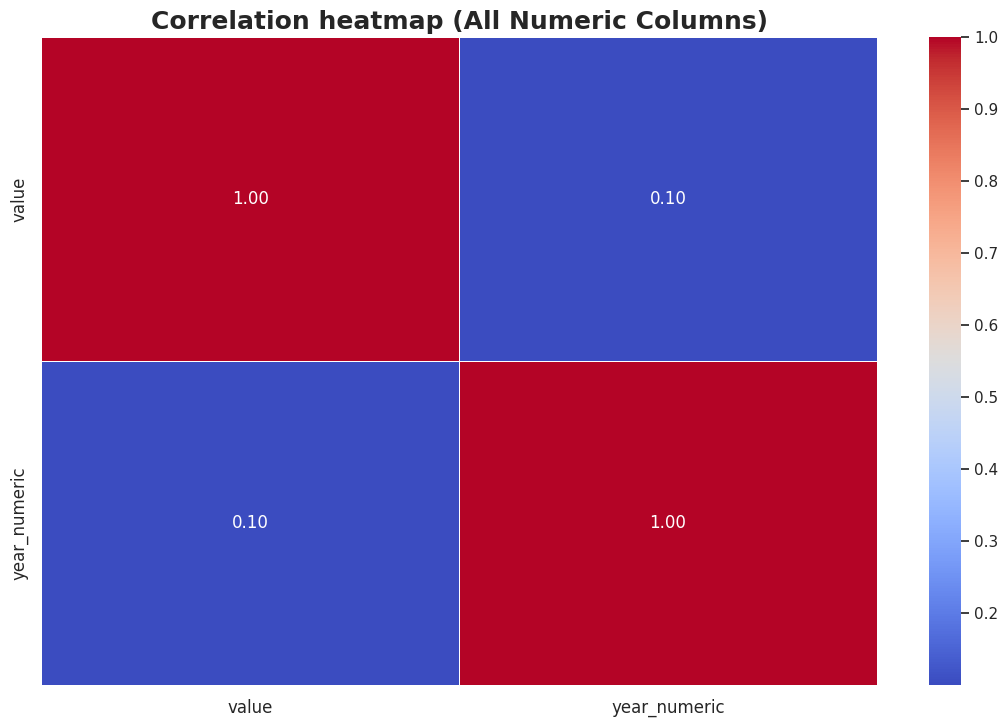

In [ ]:
sns.set(rc = {"figure.figsize" : (12, 8)}) # Adjusted figure size for better readability
df_filtered['year_numeric'] = df_filtered['year'].dt.year # Convert year to numeric for correlation
correlation_matrix = df_filtered.select_dtypes(include=np.number).corr() # Select numeric columns for correlation
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", linewidth = 0.5, fmt='.2f') # Added fmt for better annotation formatting
plt.title("Correlation heatmap (All Numeric Columns)", fontsize = 18, fontweight = "bold") # Updated title
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
print("\n" + "="*80)
print("RINGKASAN ANALISIS")
print("="*80)

print(f"\n📊 Total Penjualan EV (Historical): {df_historical['value'].sum():,.0f} unit")
print(f"📈 Pertumbuhan: {df_historical['year'].min().year} - {df_historical['year'].max().year}")
print(f"🌍 Jumlah Wilayah: {df['region'].nunique()}")
print(f"🔋 Jenis Powertrain: {df['powertrain'].nunique()}")

print("\n✓ Analisis EDA selesai!")
print("="*80)


RINGKASAN ANALISIS

📊 Total Penjualan EV (Historical): 441,564,109 unit
📈 Pertumbuhan: 2010 - 2023
🌍 Jumlah Wilayah: 54
🔋 Jenis Powertrain: 6

✓ Analisis EDA selesai!
